<a href="https://colab.research.google.com/github/sreekruti/movie_recommendation_system/blob/main/NETFLIX_RECOMMENDATION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [ ]:
netflix_df = pd.read_csv('/content/netflix_titles.csv')
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
#INFORMATION ABOUT THE DATASET
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix_df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

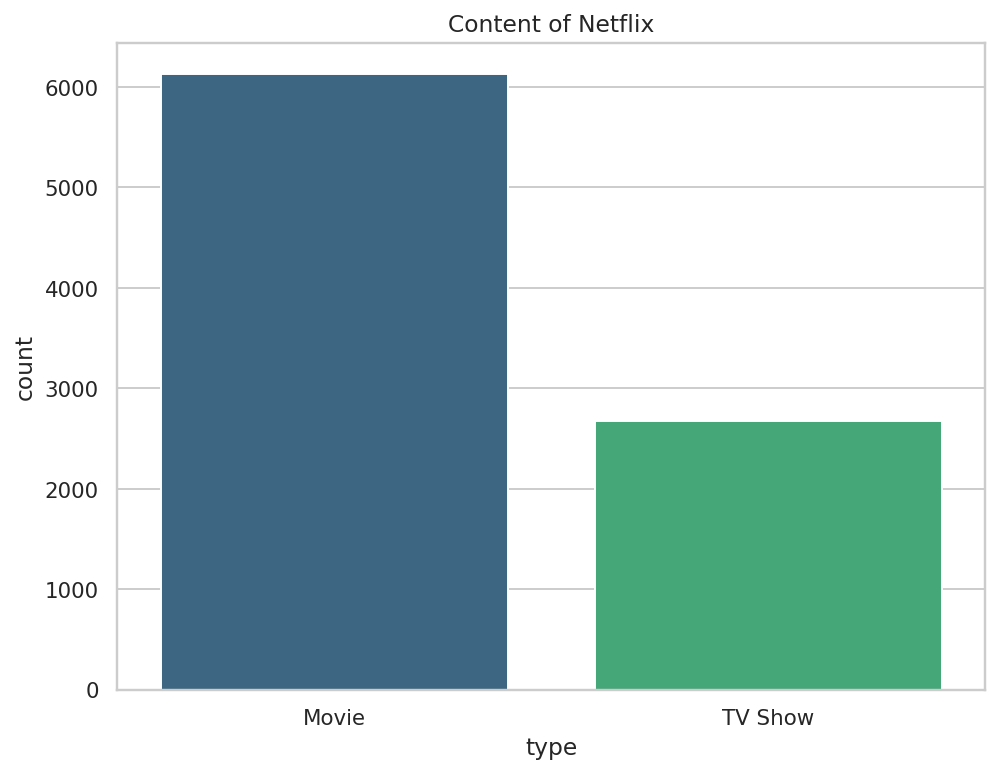

In [ ]:
#SOME VISUALISATIONS
import seaborn as sns
import matplotlib.pyplot as plt

#set the size of the plot
plt.figure(figsize =(8,6))

#create a column chart to compare the number of movies and TV shows that launched by Netflix
sns.set_style('whitegrid')
sns.countplot(x = 'type',data =netflix_df, palette = 'viridis')

plt.title('Content of Netflix')

#illustrate the bar chart
plt.show()

In [ ]:
#EXTRACTING MOVIES
netflix_df.loc[(netflix_df['type'] == 'Movie'),]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
#EXTRACTING TV SHOWS
netflix_df.loc[(netflix_df['type'] == 'TV Show'),]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


MISSING DATA CLEANING



In [ ]:

for i in netflix_df.columns:
    null_rate = netflix_df[i].isna().sum() / len(netflix_df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [ ]:
# 5 columns have missing values, with Director missing 1/3 of the time\
#In this case, I will:
#replace blank countries with the mode (most common) country
#I want to keep director as it could be interesting to look at a certain director's films
#I want to keep cast as it could be interesting to look at a certain cast's films

In [ ]:
# Replacments

netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])


netflix_df['cast'].replace(np.nan, 'No Data',inplace  = True)
netflix_df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

netflix_df.dropna(inplace=True)

# Drop Duplicates

netflix_df.drop_duplicates(inplace= True)

In [ ]:
#checking for null values
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [ ]:
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])

netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df['month_name_added']=netflix_df['date_added'].dt.month_name()
netflix_df['year_added'] = netflix_df['date_added'].dt.year

netflix_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


NETFLIX THROUGH THE YEARS


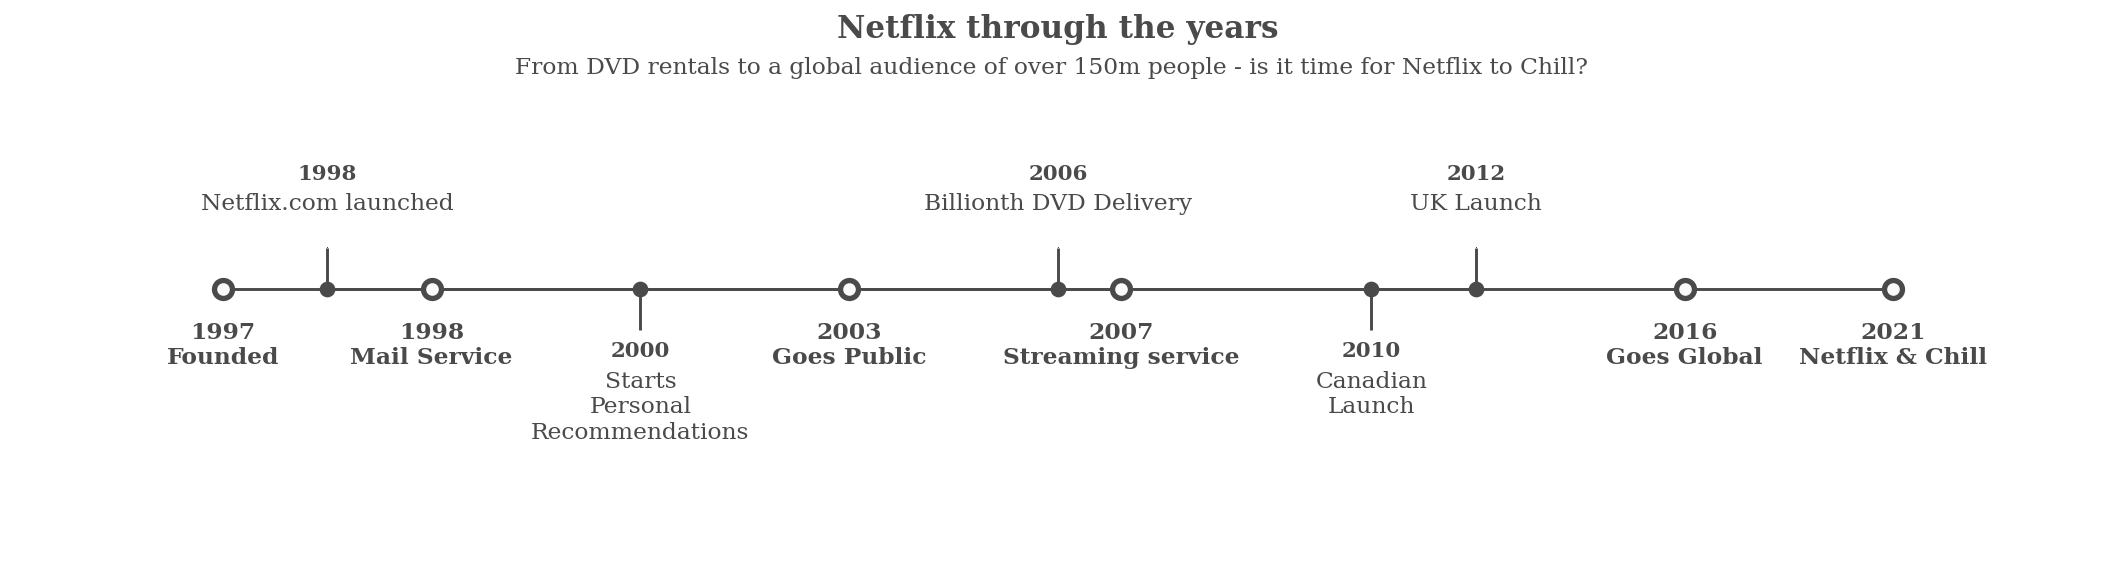

In [ ]:
#NETFLIX THROUGH THE YEARS
#Netflix started as DVD rentals, and now they have an audience of over 150m people - this is their story

from datetime import datetime

## these go on the numbers below
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8,9]

## these go on the numbers
tl_sub_x = [1.5,3,5,6.5,7]


tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch"]



# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)


# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center',
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)


# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center',
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a'  , fontsize=11)

    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center',
        fontfamily='serif',color='#4a4a4a'  )



# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks
ax.set_xticks([])
ax.set_yticks([])

# Title
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()


VISUALISATIONS ON COUNTRY AND TYPE OF CONTENT



Text(0.5, 1.0, 'YEAR VS MOVIE & TV SHOWS')

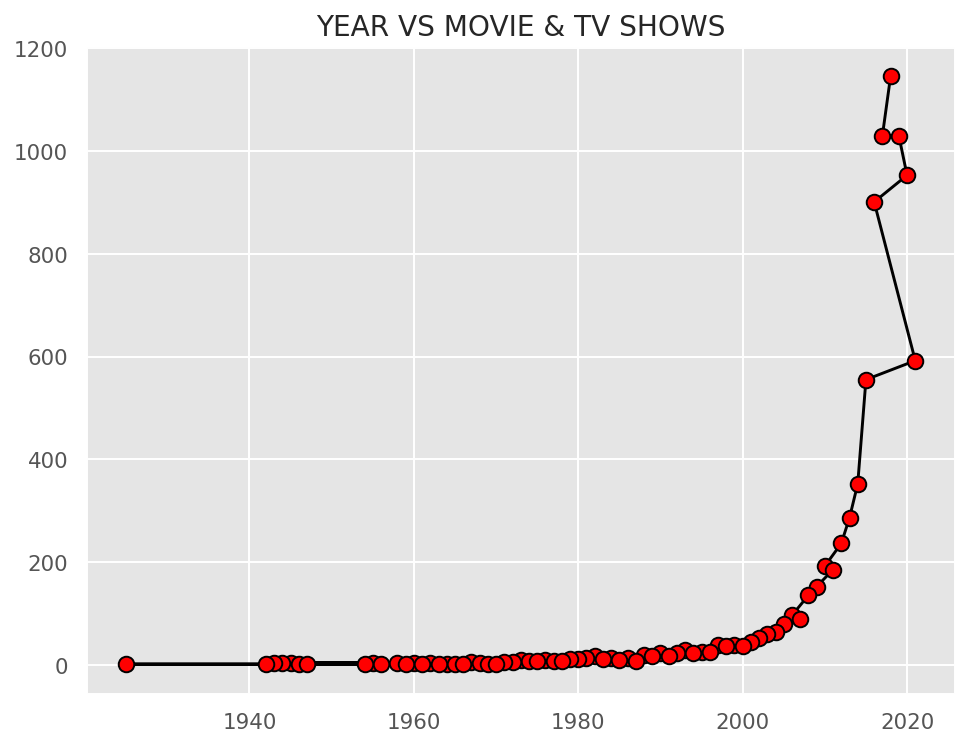

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#set the size of the plot
plt.figure(figsize =(8,6))

#Create a line chart to visualize how the Movies and TV Shows cahnges over time
plt.style.use("ggplot")
netflix_df["release_year"].value_counts().plot(kind ="line",color = 'black',linestyle = 'solid', marker = 'o',markerfacecolor = 'red', markersize = 8)
plt.title("YEAR VS MOVIE & TV SHOWS")

In [ ]:
#Now  let's have a look at the content netflix offers
# For viz: Ratio of Movies & TV shows

x=netflix_df.groupby(['type'])['type'].count()
y=len(netflix_df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

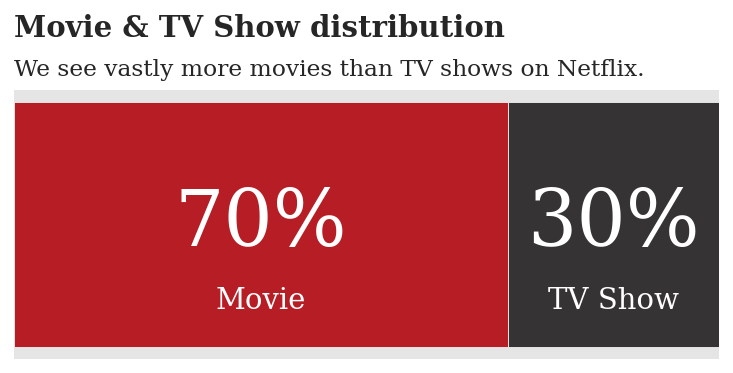

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'],
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'],
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%",
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie",
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')


for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%",
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show",
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)



#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()


Text(0.5, 1.0, 'Top 10 Countries Content On Netflix')

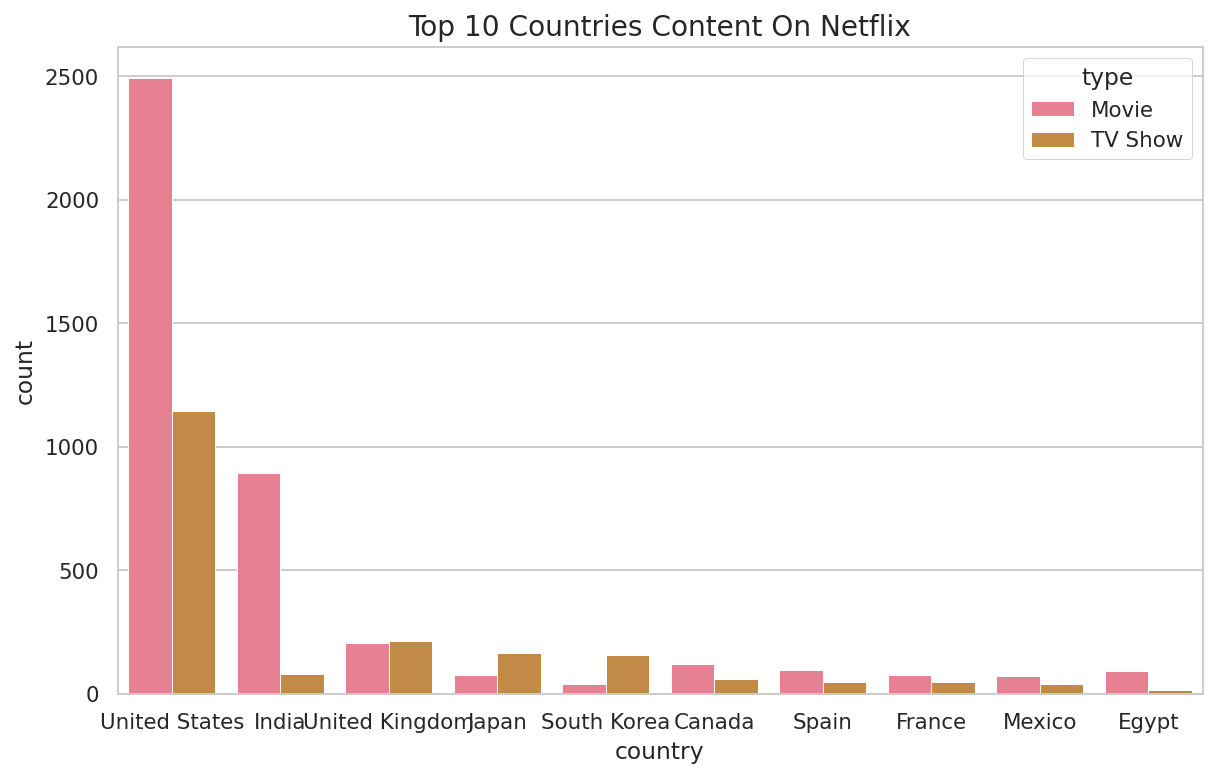

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#set the size of the plot
plt.figure(figsize =(10,6))

#Create a column chart to compare the Movies/TV Shows produced by differnet countries
sns.set_style("whitegrid")
sns.countplot(x="country", order = netflix_df["country"].value_counts().index[0:10],hue = "type",
              data = netflix_df,palette=sns.color_palette("husl", 9))
plt.title("Top 10 Countries Content On Netflix")

In [ ]:
from collections import Counter
!pip install pycountry

In [ ]:
import pycountry
import matplotlib.gridspec as gridspec

In [ ]:
country = netflix_df['country']
country = list(country)
total = []
for i in range(len(country)):
    total+=str(country[i]).split(", ")
country = Counter(total)
country = sorted(country.items(), key=lambda x : x[1],reverse=True)
name = list(map(lambda x : x[0],country))
count = list(map(lambda x : x[1],country))

country_name = name[0:3] + name[4:11]
country_name.reverse()
country_count = count[0:3] + count[4:11]
country_count.reverse()

country_data = pd.DataFrame(name,count).reset_index()
country_data.columns=['count', 'country']
country_data = country_data.drop(3)
country_data = country_data.reset_index(drop=True)
country_data['country'] = country_data['country'].apply(lambda x : x.replace(",",""))

not_have = {'South Korea' : 'KOR', 'West Germany' : 'DEU','Soviet Union':'SUN','East Germany':'DEU'}
for i in range(len(country_data['country'])):
    if country_data.loc[i, 'country'] in not_have.keys():
        country_data.loc[i, 'country'] = not_have[country_data.loc[i, 'country']]

country_data['country'] = country_data['country'].apply(lambda x : pycountry.countries.search_fuzzy(x)[0].alpha_3)
country_data = country_data.groupby('country').sum()
country_data = country_data.reset_index()


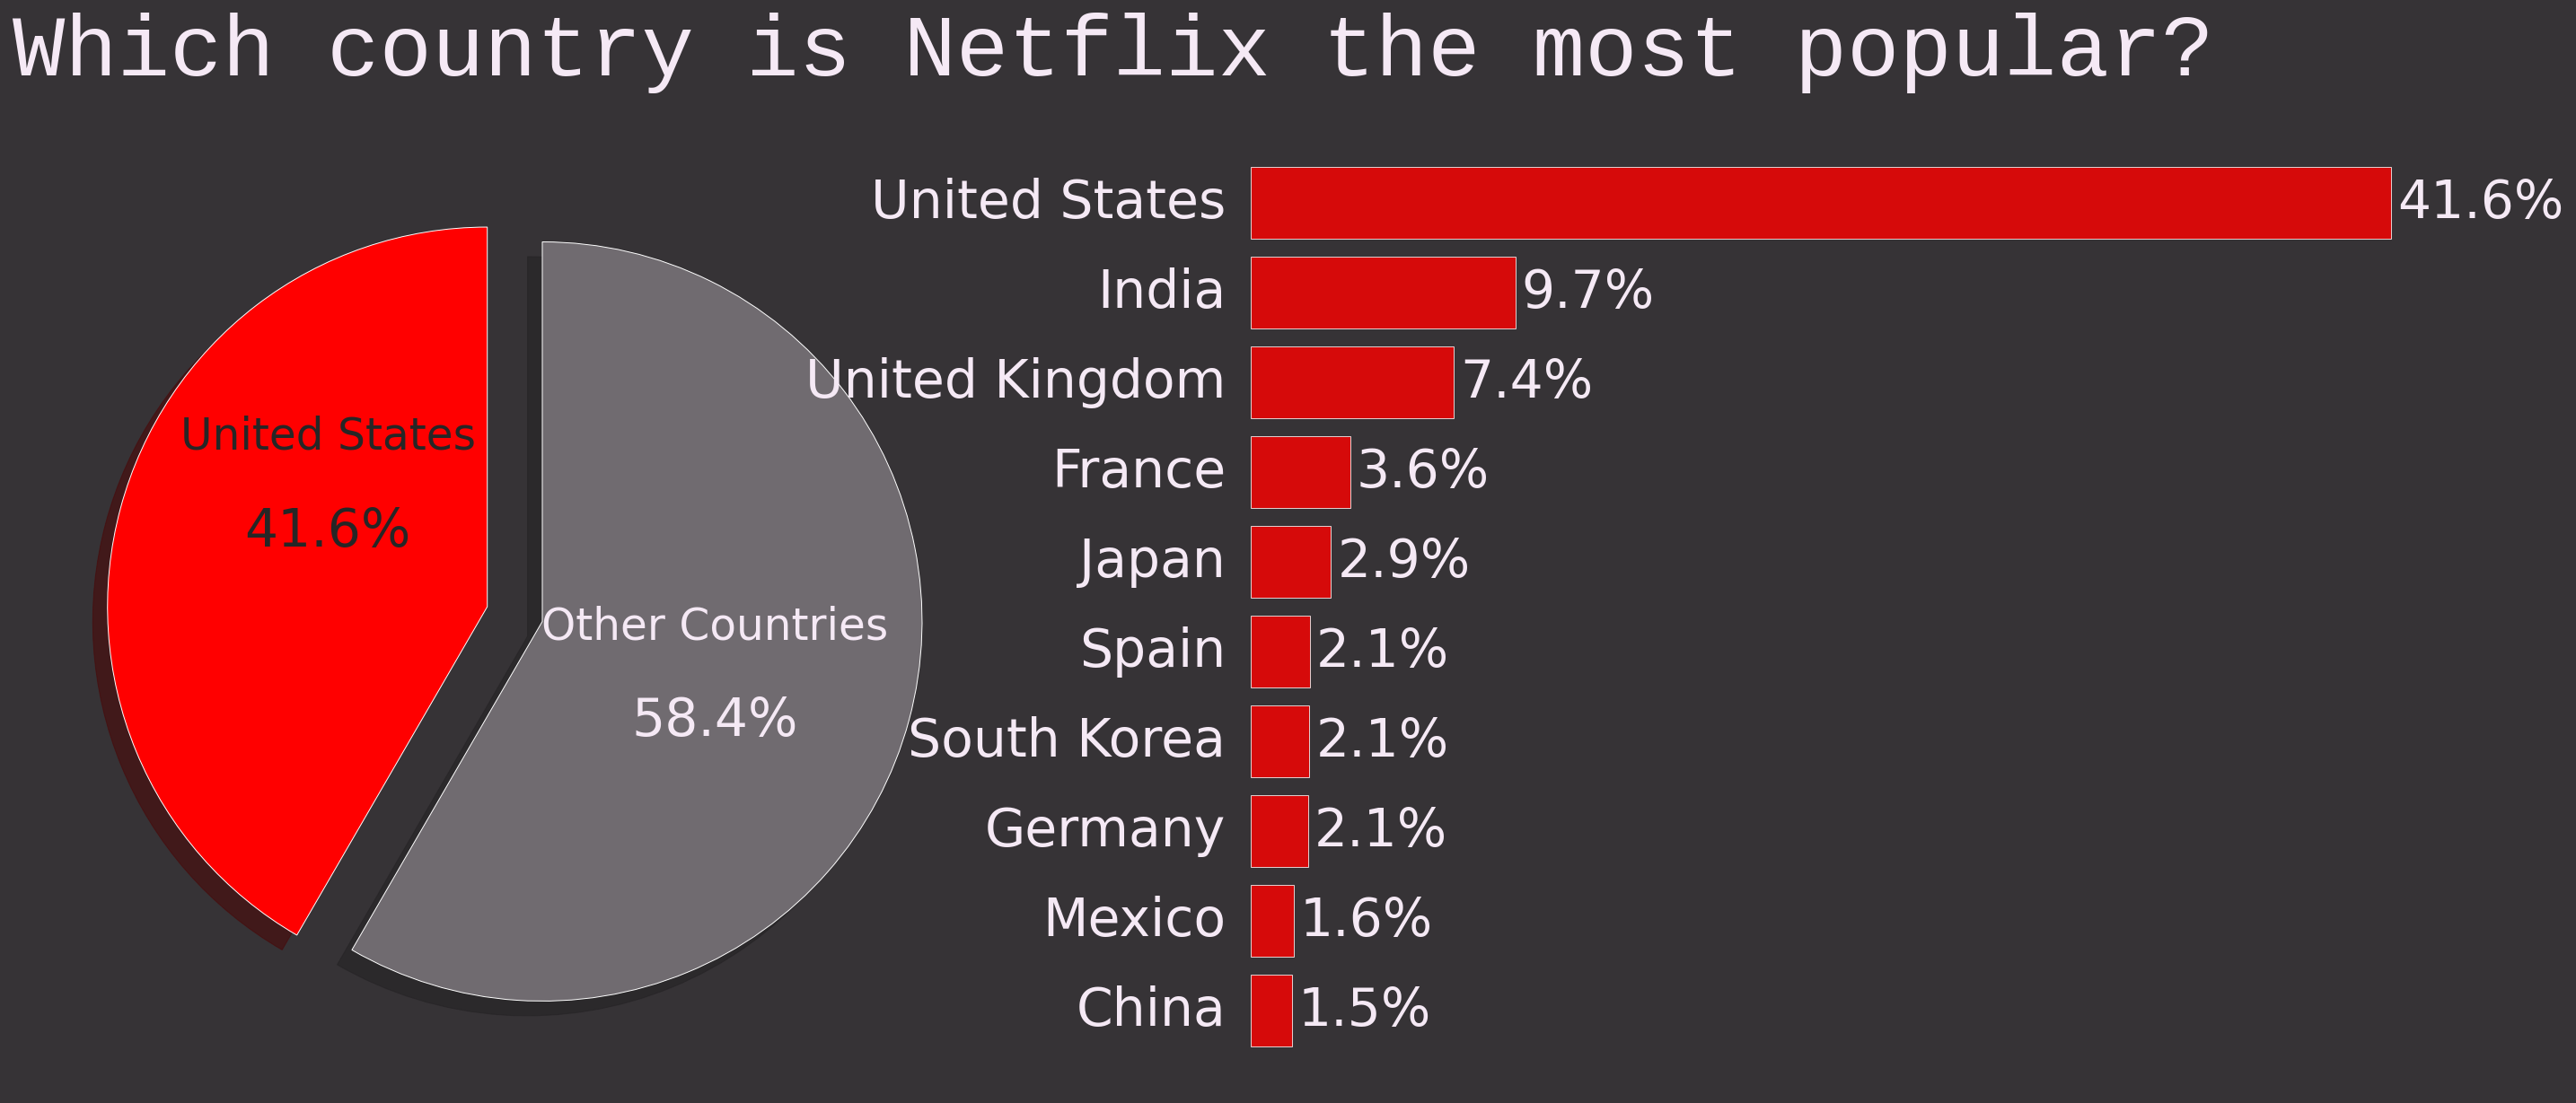

In [ ]:
labels = ['United States', 'Other Countries']
sizes = [count[0], sum(count[1:])]
explode = (0, 0.15)

fig, ax = plt.subplots(figsize=(25,10),facecolor="#363336")
ax.patch.set_facecolor('#363336')

spec = gridspec.GridSpec(ncols=10, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, :4],facecolor="#363336")
ax2 = fig.add_subplot(spec[0, 5:],facecolor="#363336")

ax1.pie(sizes, explode=explode, shadow=True, startangle=90, colors =['red','#706B70'])
ax1.text(s=labels[0],x=-0.42,y=0.45,fontsize=25,va='center',ha='center')
ax1.text(s=f"{round(sizes[0]/(sizes[0]+sizes[1]) * 100,1)}%",x=-0.42,y=0.2,fontsize=30,va='center',ha='center')
ax1.text(s=labels[1],x=0.6,y=-0.05, fontsize=25,color='#F5E9F5',va='center',ha='center')
ax1.text(s=f"{round(sizes[1]/(sizes[0]+sizes[1]) * 100,1)}%",x=0.6,y=-0.3, fontsize=30,color='#F5E9F5',va='center',ha='center')

ax2.barh(y=country_name, width=country_count, color = 'red', alpha=0.8)
for i in range(10):
    ax2.text(s=f"{country_name[i]}",x=-100,y=i,color='#F5E9F5', va="center",ha="right",fontsize=30)
    ax2.text(s=f"{round(country_count[i]/sum(count)*100,1)}%",x=country_count[i]+25,y=i,color='#F5E9F5', va="center",ha="left",fontsize=30)

ax2.axis("off")
ax.axis("off")
ax.text(s="Which country is Netflix the most popular?", x= 0,y=1.05,color='#F5E9F5',font='Liberation Mono',fontsize=50)
plt.show()

In [ ]:
#As expected, the United States ranked first in market share.
#Surprisingly, it has more than a third of the market share.
#India and United Kingdom also showed high market share
#The most prolific producers of content for Netflix are, primarily,the USA, with India and the UKa significant distance behind.

#It makes sense that the USA produces the most content as, afterall, Netflix is a US company.

In [ ]:
# Quick feature engineering

# Helper column for various plots
netflix_df['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned
# Lets retrieve just the first country
netflix_df['first_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['first_country'].head()

# Genre

netflix_df['genre'] = netflix_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))

# Reducing name length

netflix_df['first_country'].replace('United States', 'USA', inplace=True)
netflix_df['first_country'].replace('United Kingdom', 'UK',inplace=True)
netflix_df['first_country'].replace('South Korea', 'S. Korea',inplace=True)


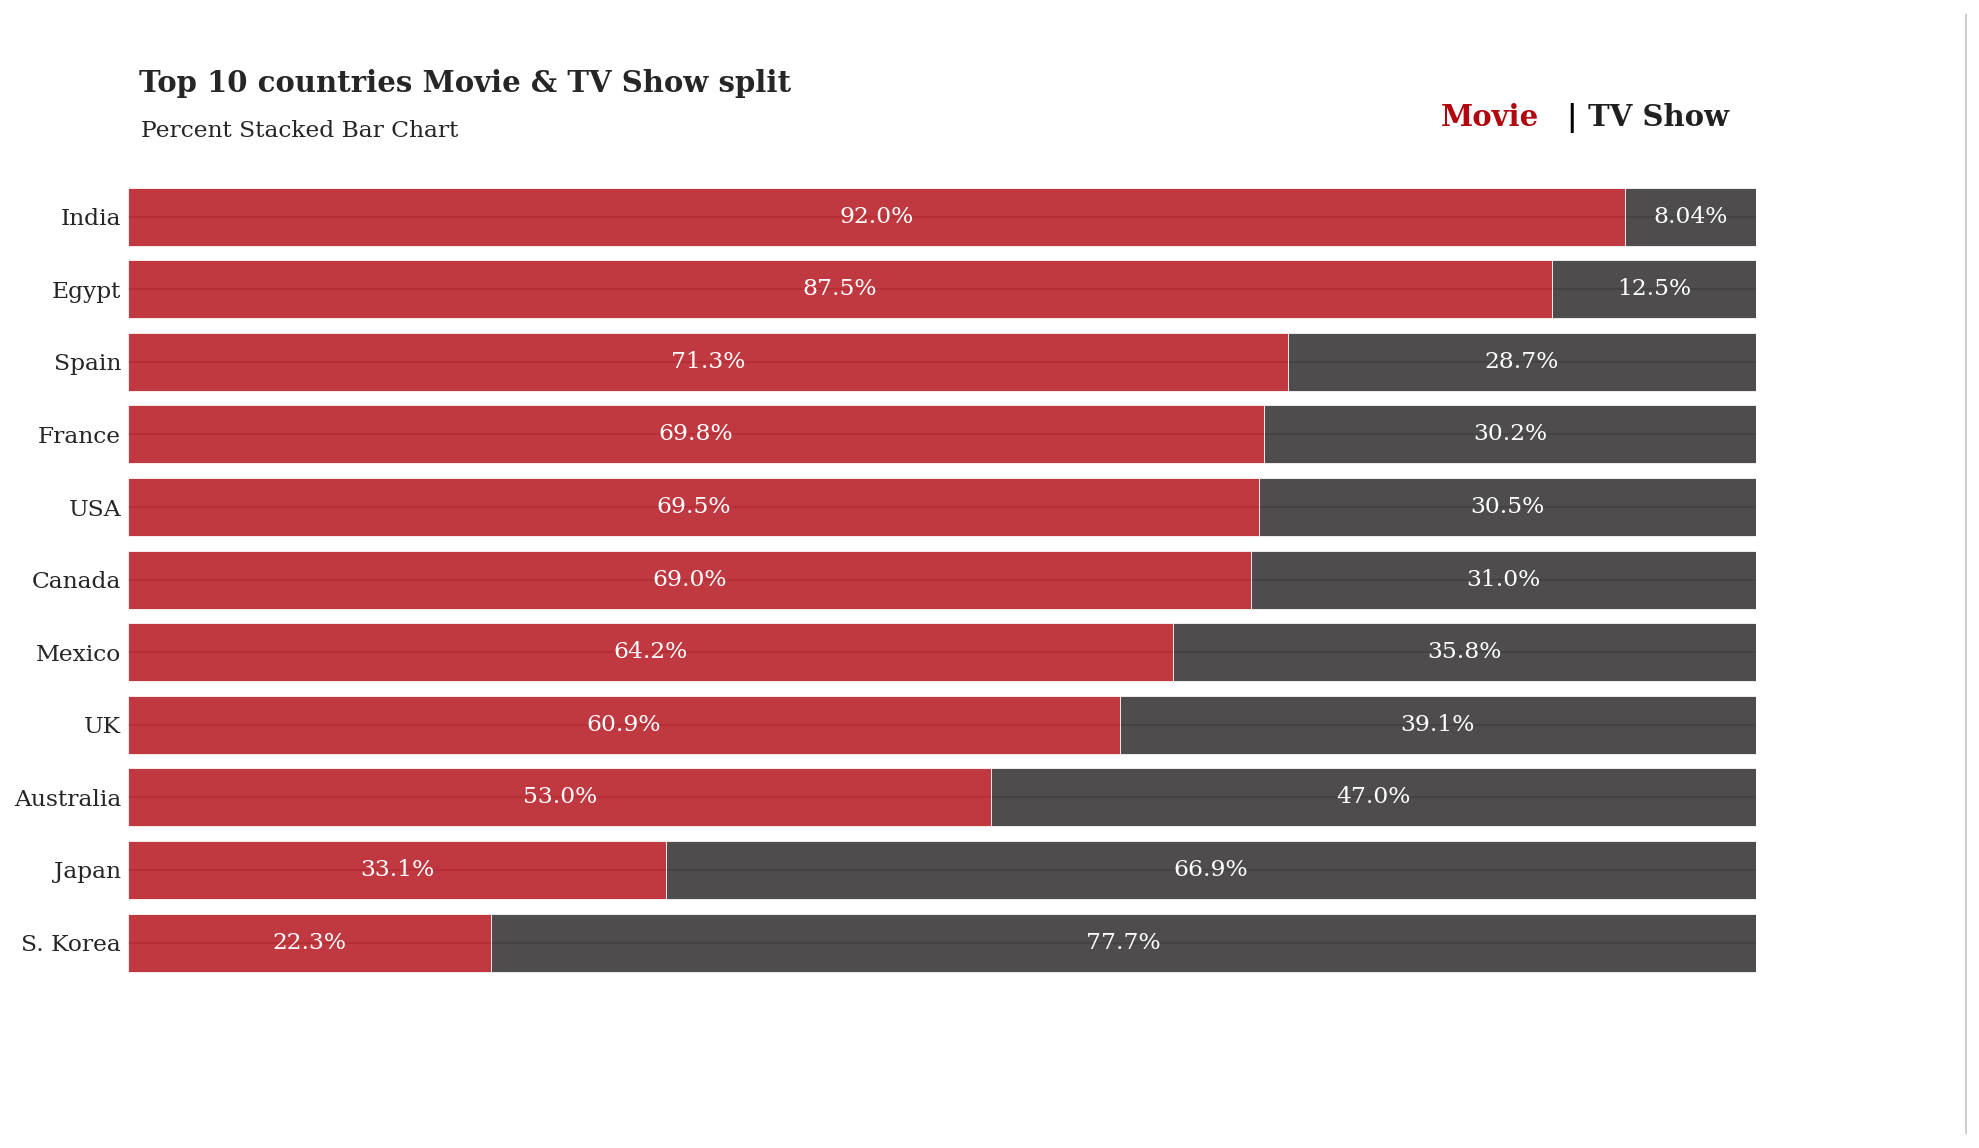

In [ ]:
country_order = netflix_df['first_country'].value_counts()[:11].index
data_q2q3 = netflix_df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]




###
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'],
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'],
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%",
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%",
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')


fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [ ]:
#Interestingly, Netflix in India is made up nearly entirely of Movies.

#Bollywood is big business, and perhaps the main focus of this industry is Movies and not TV Shows.

#South Korean Netflix on the other hand is almost entirely TV Shows.

#The underlying reasons for the difference in content must be due to market research conducted by Netflix.

VISUALISATION ON RATINGS COLUMN


In [ ]:
order = pd.DataFrame(netflix_df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

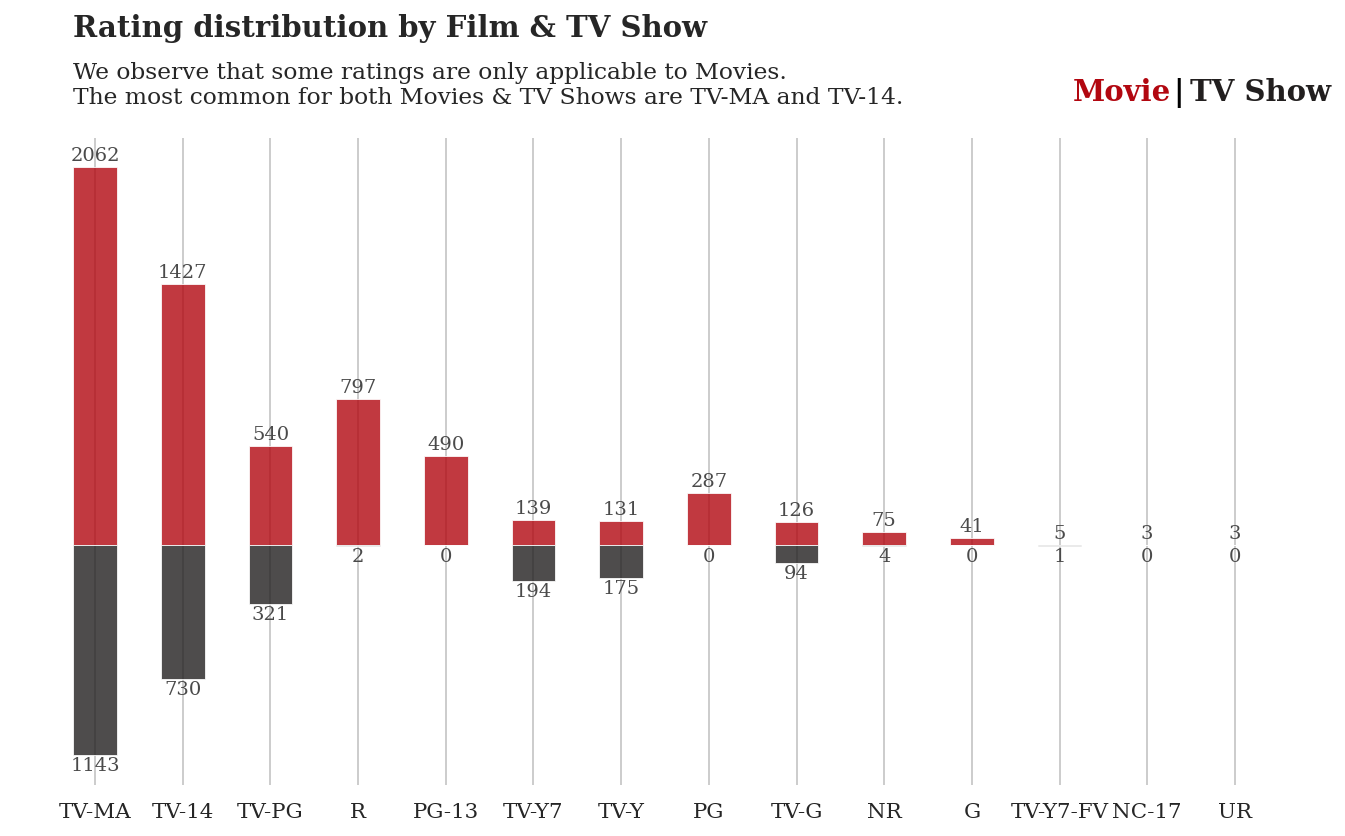

In [ ]:
mf = netflix_df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}",
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

for i in movie.index:
    ax.annotate(f"{movie[i]}",
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')



for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89,
'''We observe that some ratings are only applicable to Movies.
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()


GROWTH OF NETFLIX

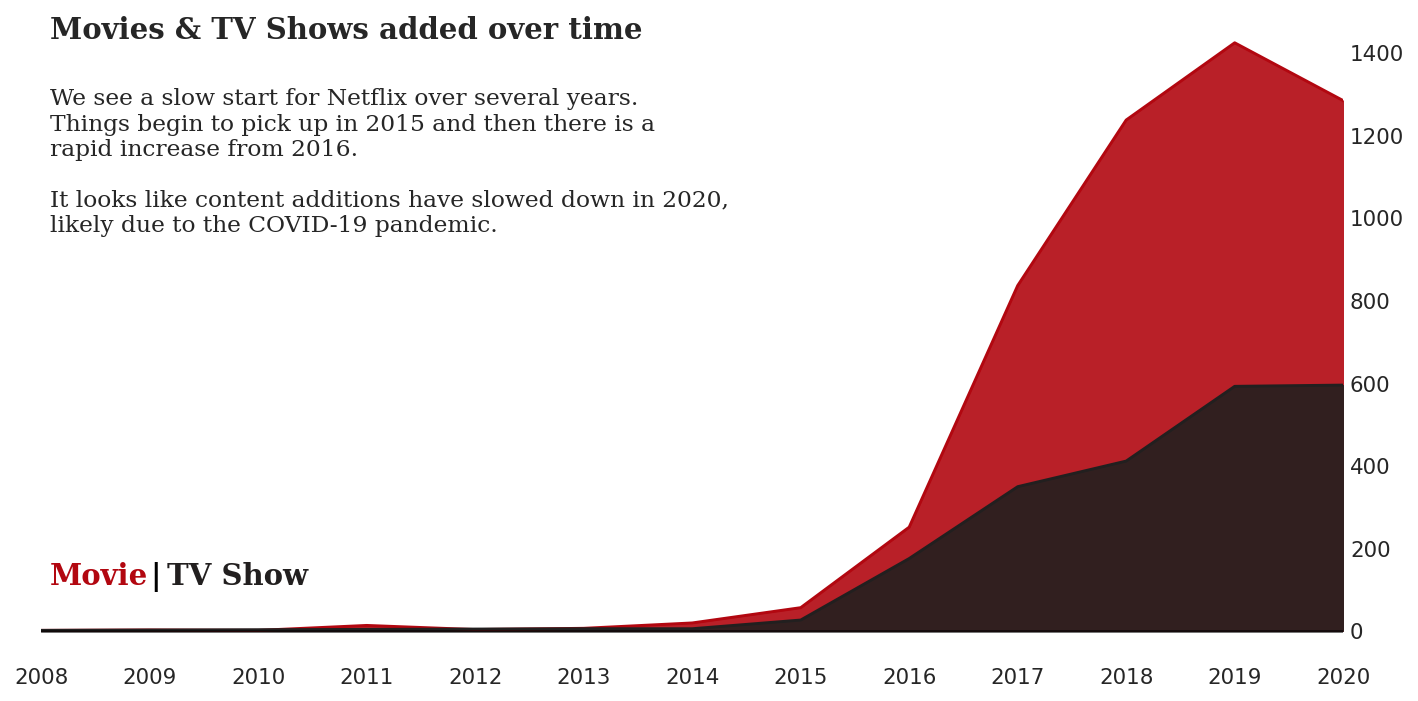

In [ ]:
#How has content been added over the YEARS

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(netflix_df['type'].value_counts().index):
    mtv_rel = netflix_df[netflix_df['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

ax.yaxis.tick_right()

ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59,
'''We see a slow start for Netflix over several years.
Things begin to pick up in 2015 and then there is a
rapid increase from 2016.

It looks like content additions have slowed down in 2020,
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [ ]:
#How has content been added over the MONTHS

month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

netflix_df['month_name_added'] = pd.Categorical(netflix_df['month_name_added'], categories=month_order, ordered=True)

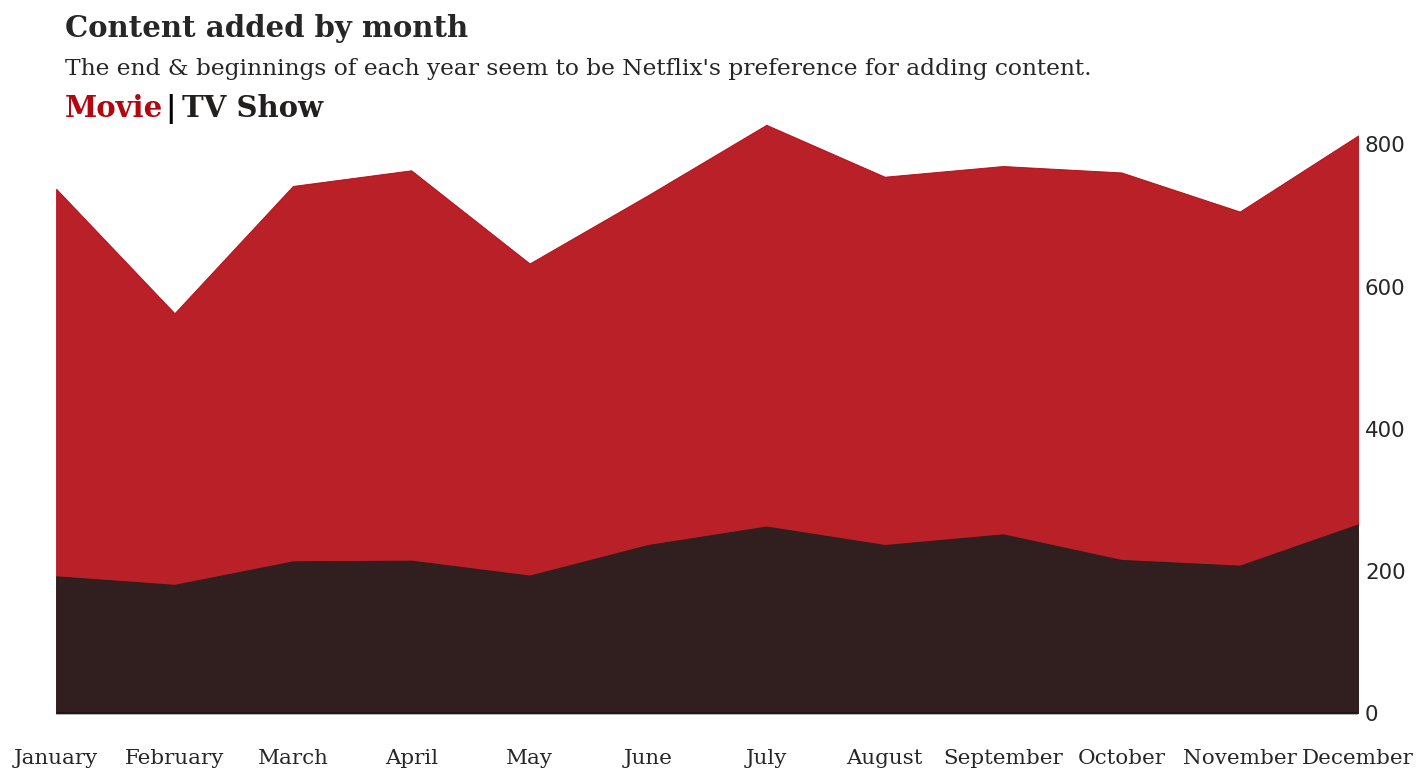

In [ ]:
data_sub = netflix_df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(netflix_df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)



ax.yaxis.tick_right()

ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

#ax.set_xlim(2008,2020)
#plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.95, 'Content added by month', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.905,
"The end & beginnings of each year seem to be Netflix's preference for adding content."

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [ ]:
#Yes, December & January are definitely the best months for new content.
#Maybe Netflix knows that people have a lot of time off from work over this period and that it is a good time to reel people in
#February is the worst

In [ ]:
#NETFLIX STOCKS
stock_price = pd.read_csv("/content/NFLX.csv")
stock_price['Date'] = stock_price['Date'].apply(lambda x: x.replace(" ","").replace("Year","/").replace("Month",""))
stock_price["Date"] = pd.to_datetime(stock_price['Date'])

stock_price= stock_price[['Date',"Close"]]

stock_price.columns = ['date','price']

In [ ]:
import datetime

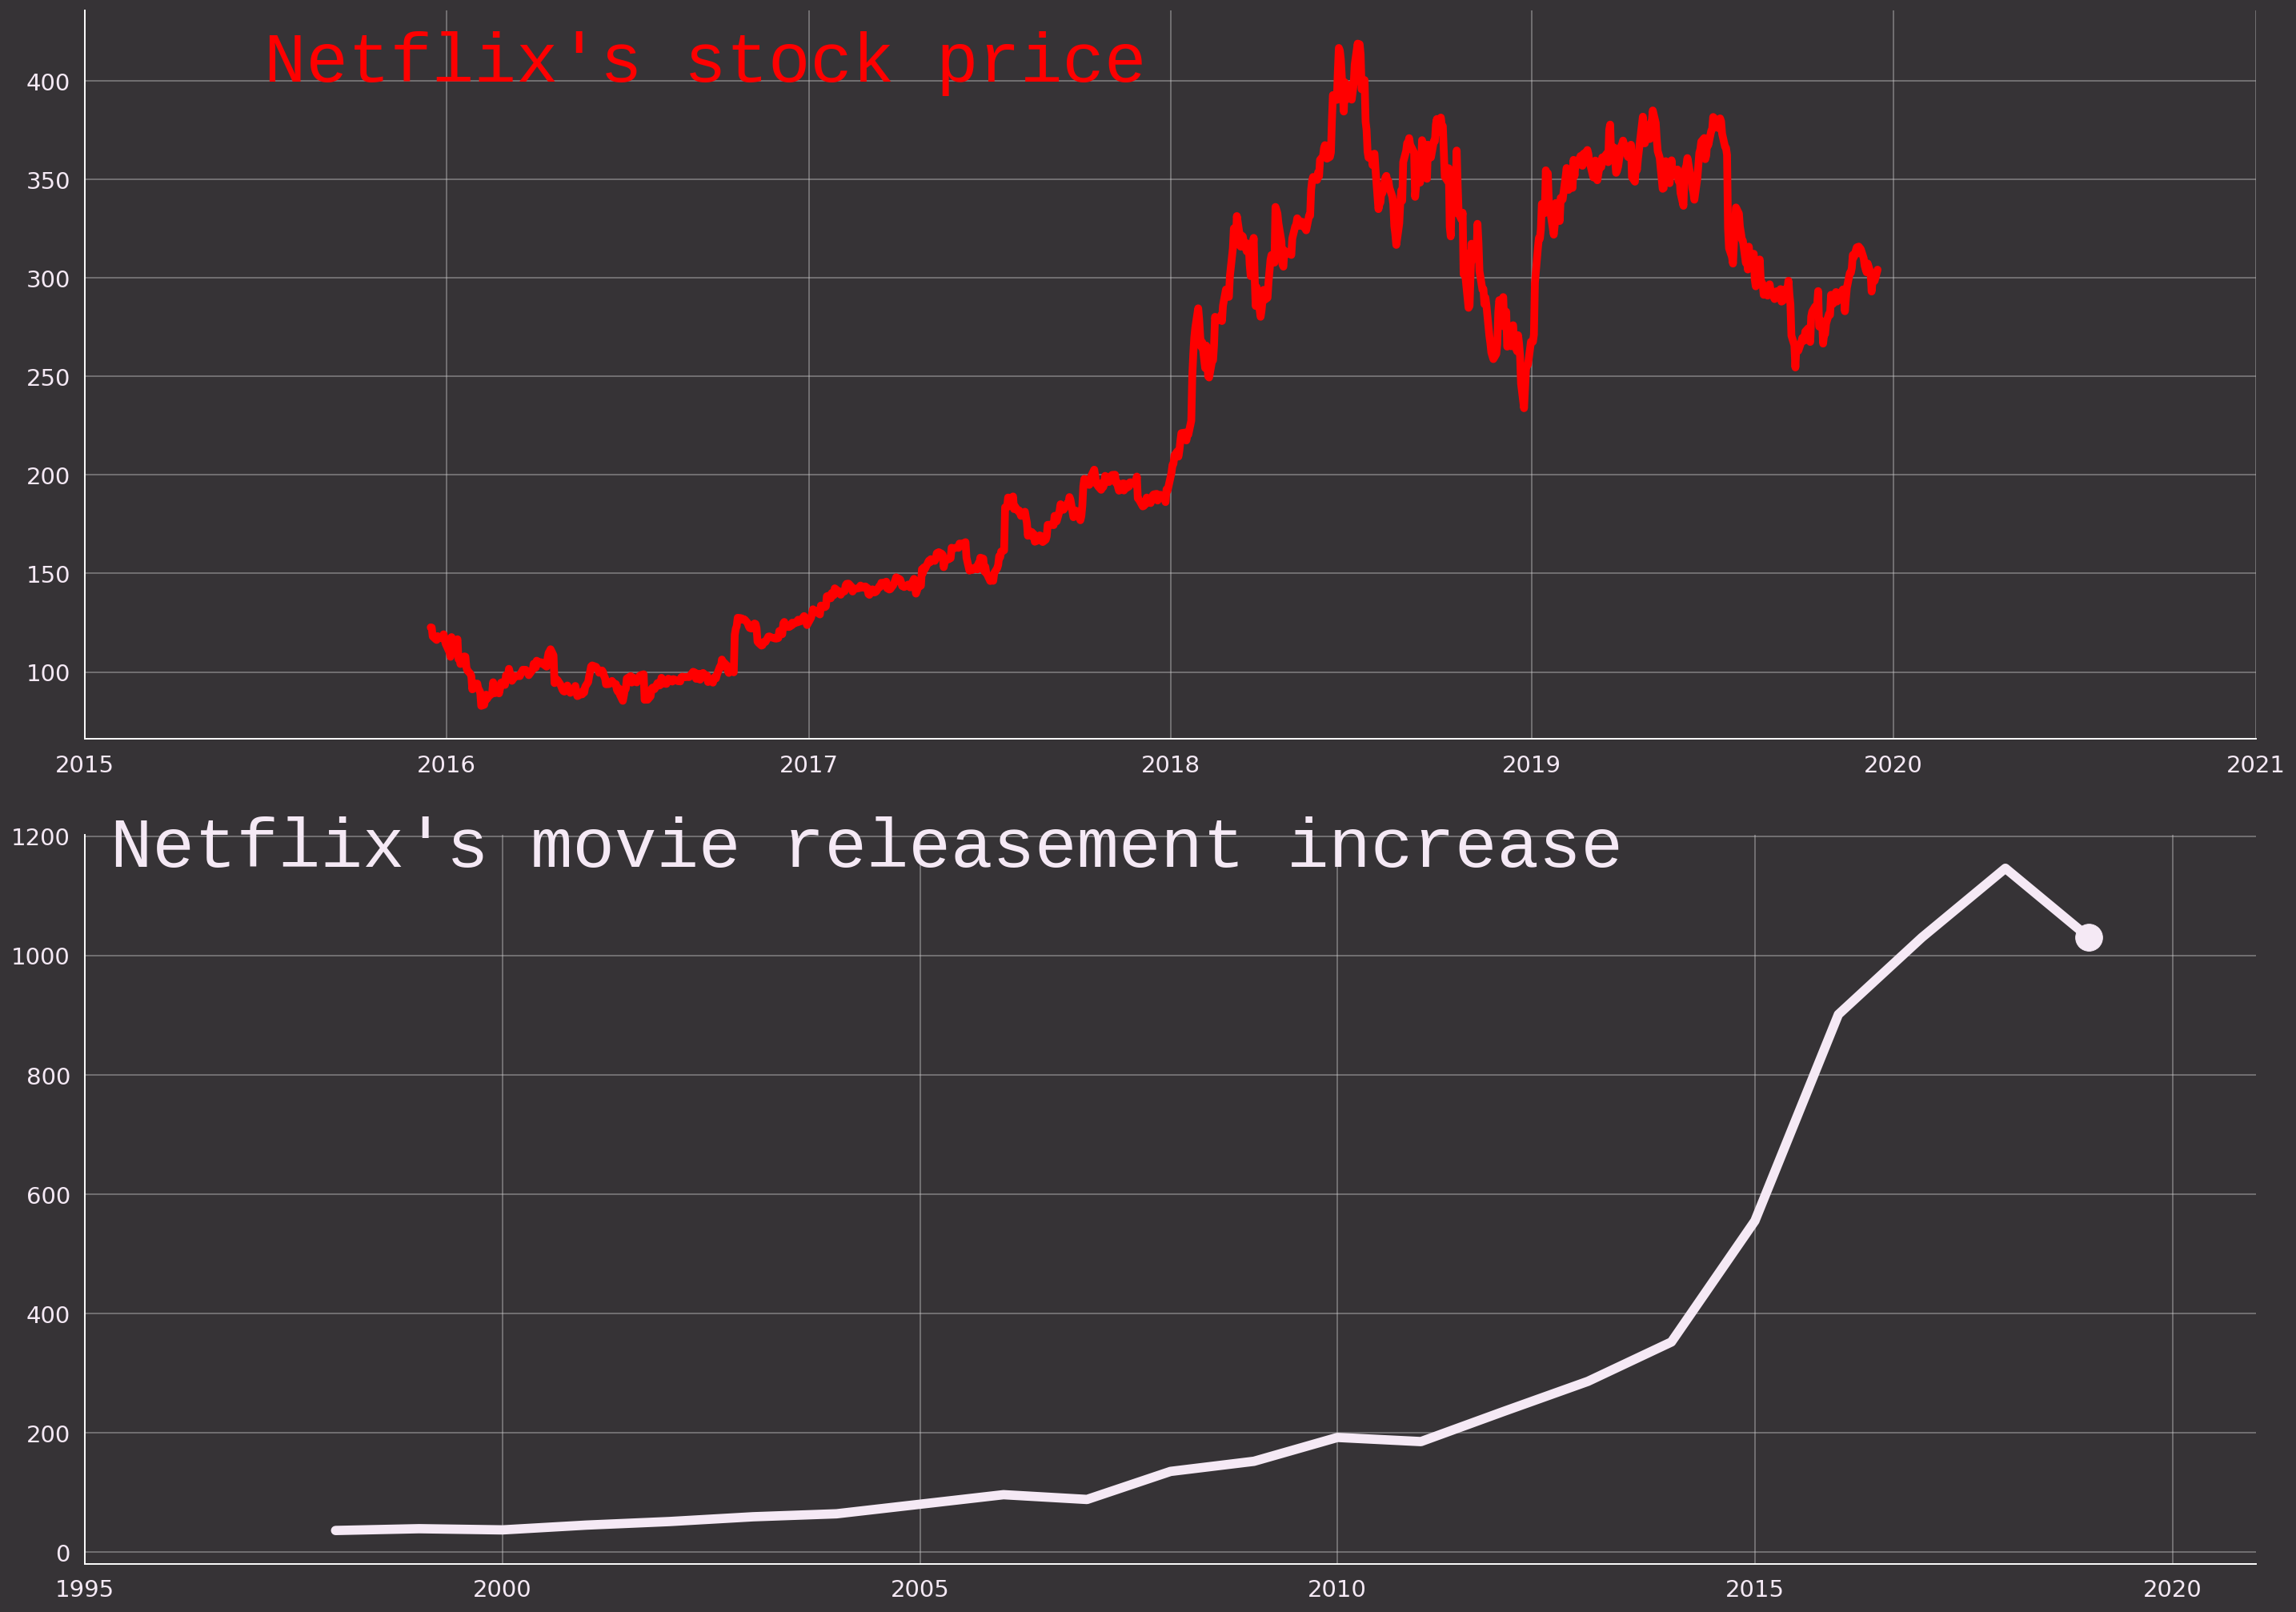

In [ ]:
fig, ax = plt.subplots(figsize=(25,18),facecolor="#363336")
ax.patch.set_facecolor('#363336')

spec = gridspec.GridSpec(ncols=1, nrows=19, figure=fig)
ax1 = fig.add_subplot(spec[:9, 0],facecolor="#363336")
ax2 = fig.add_subplot(spec[10:, 0],facecolor="#363336")
ax1.patch.set_facecolor('#363336')
sns.lineplot(x= stock_price['date'],y=stock_price['price'],lw=5, color='red',ax= ax1)
ax1.tick_params(axis='x', colors='#F5E9F5',labelsize=15)
ax1.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(True, alpha=0.4)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.text(s="Netflix's stock price", x= datetime.date(2015, 7, 1), y=400,font="Liberation Mono",fontsize=45,color = 'red')
ax1.set_xlim([datetime.date(2015, 1, 1), datetime.date(2021, 1, 1)])

a = dict(netflix_df['release_year'].value_counts())
a = sorted(a.items(), key = lambda x : x[0])
ax2.scatter(x= list(map(lambda x : x[0],a))[-3], y = list(map(lambda x : x[1],a))[-3], color="#F5E9F5", s= 300)
sns.lineplot(x= list(map(lambda x : x[0],a))[50:-2], y = list(map(lambda x : x[1],a))[50:-2],lw=6, color='#F5E9F5', ax=ax2)
ax2.tick_params(axis='x', colors='#F5E9F5',labelsize=15)
ax2.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax2.spines['bottom'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.grid(True, alpha=0.4)
ax2.text(s="Netflix's movie releasement increase", x=1995.3, y=1150, font="Liberation Mono",fontsize=45,color = '#F5E9F5')
ax2.set_xlim(1995,2021)

direct = ['right', 'left','bottom','top']
for di in direct:
    ax.spines[di].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [ ]:
#I prepared two chart to show Netflix's growth
#First is Netflix's stock price.
#Surely, Stock price doesn't explain that It's growth all.
#Now second chart.
#This is Netflix's movie releasement increase.
#It shows that Netflix made an aggressive investment.
#Although, at 2020 discreased, because of Covid-19
#But, I think it has increased again after Covid-19 and start of the release of the movie.
#We can notice that, both stock price, and movie releasement increase have exploded since 2014

VISUALISATION ON GENERES


In [ ]:

# Genres
from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.colors


# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])



def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas.

             Another observation is that
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)

    plt.show()

There are 20 types in the Netflix Movie Dataset


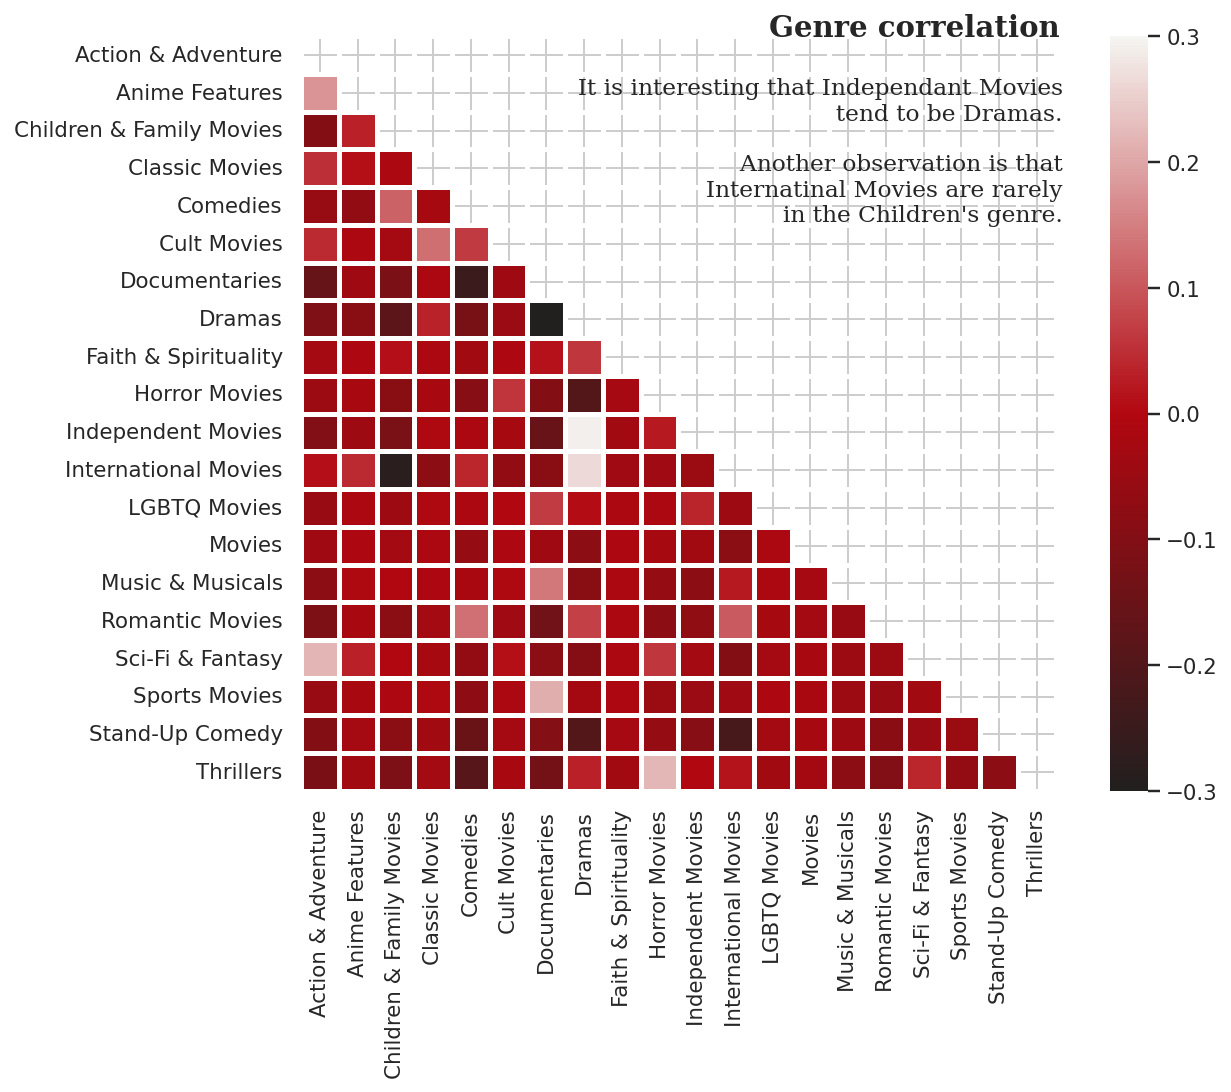

In [ ]:

df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

VISUALISATION ON TARGET AGES

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_df['target_ages'] = netflix_df['rating'].replace(ratings_ages)
netflix_df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
data =netflix_df.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']


df_heatmap = netflix_df.loc[netflix_df['first_country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['first_country'],df_heatmap['target_ages'],normalize = "index").T

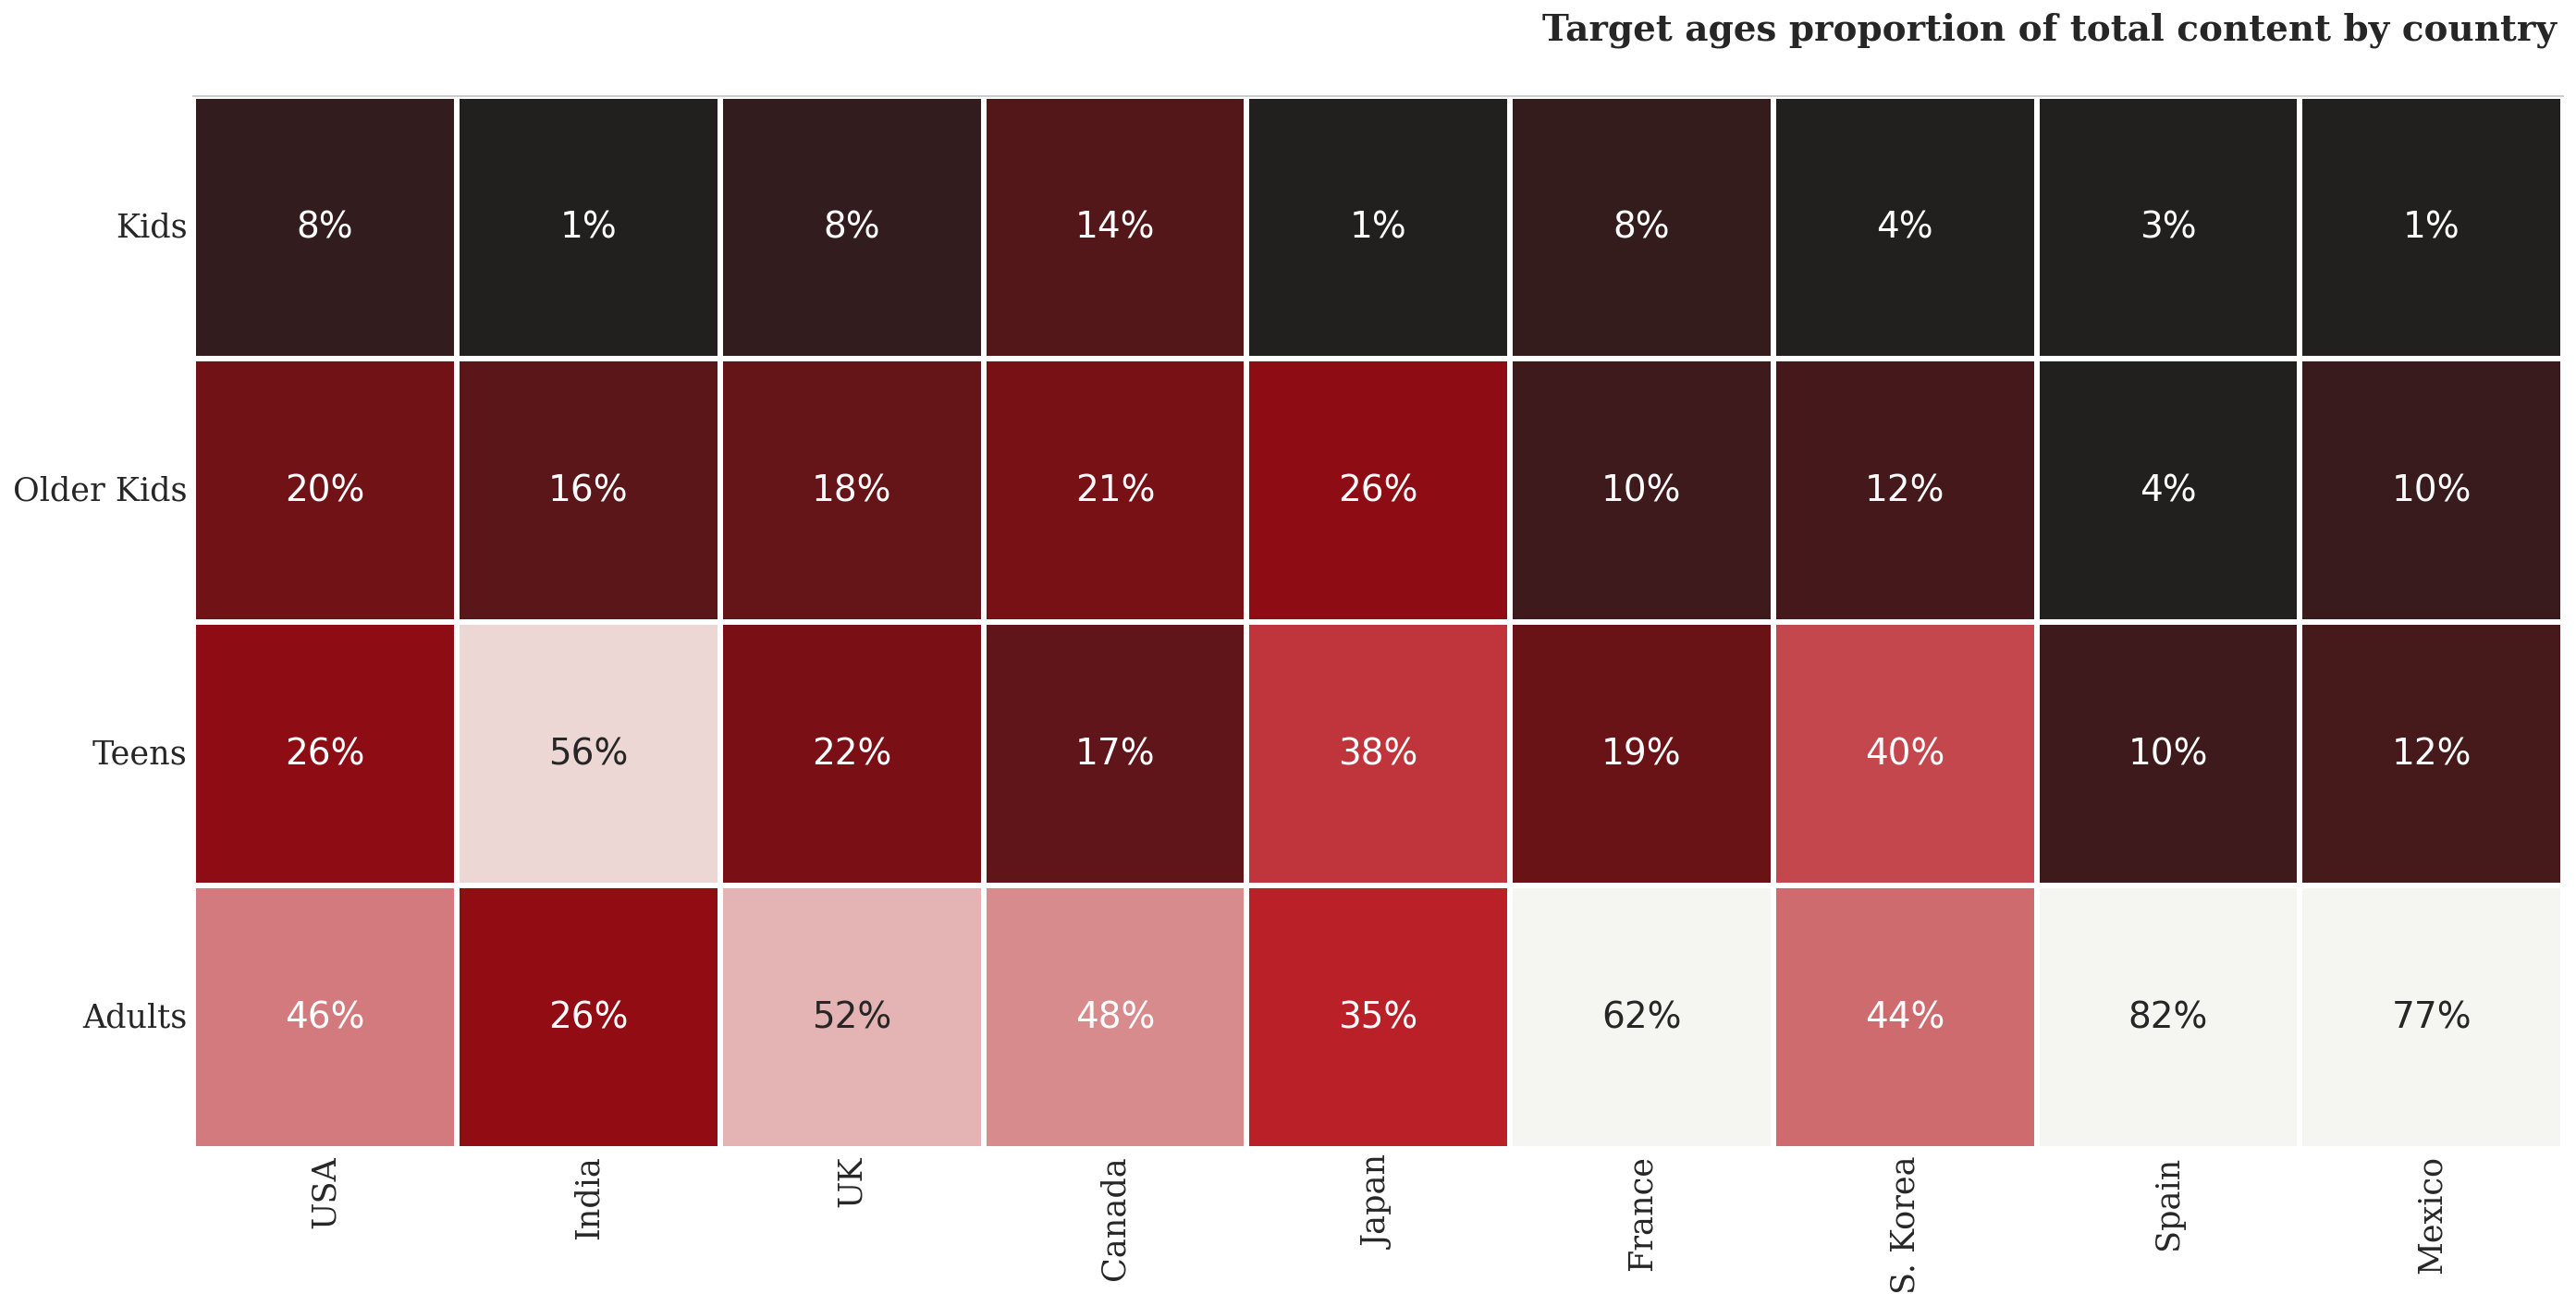

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

country_order2 = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain',
       'Mexico']

age_order = ['Kids','Older Kids','Teens','Adults']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap=cmap,square=True, linewidth=3,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":20})

ax.spines['top'].set_visible(True)


fig.text(.99, .725, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=20,ha='right')

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=18)

ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()


In [ ]:
#Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.
#It is also interesting to note similarities between culturally similar countries
# the US & UK are closey aligned with their Netflix target ages, yet vastly different to say, India or Japan!

In [ ]:
#Let's have a quick look at the lag between when content is released and when it is added on Netflix

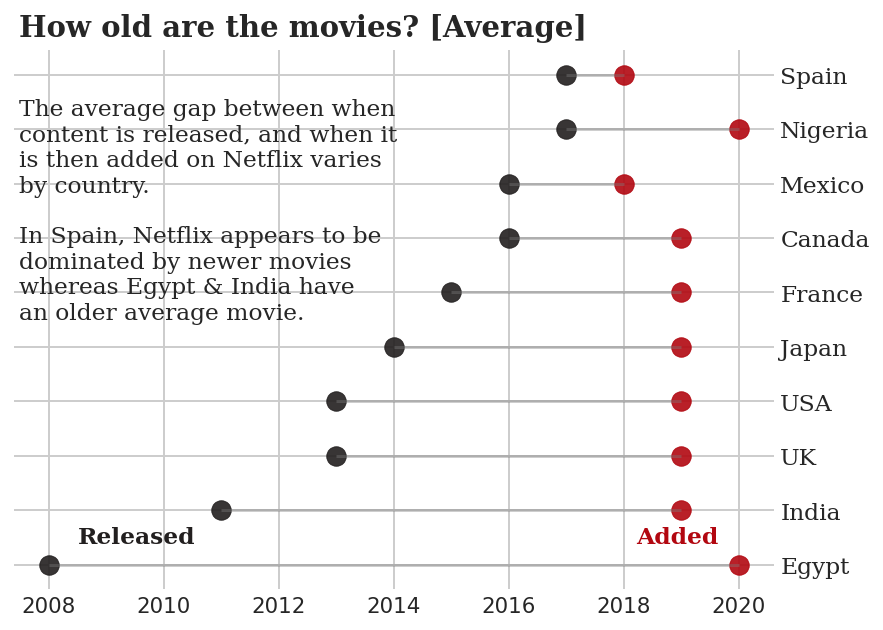

In [ ]:

df_movies
df_tv

### Relevant groupings

data = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)

# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.76,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')


fig.text(0.13, 0.46,
'''The average gap between when
content is released, and when it
is then added on Netflix varies
by country.

In Spain, Netflix appears to be
dominated by newer movies
whereas Egypt & India have
an older average movie.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


#plt.xlabel('Year')
#plt.ylabel('Country')
plt.show()

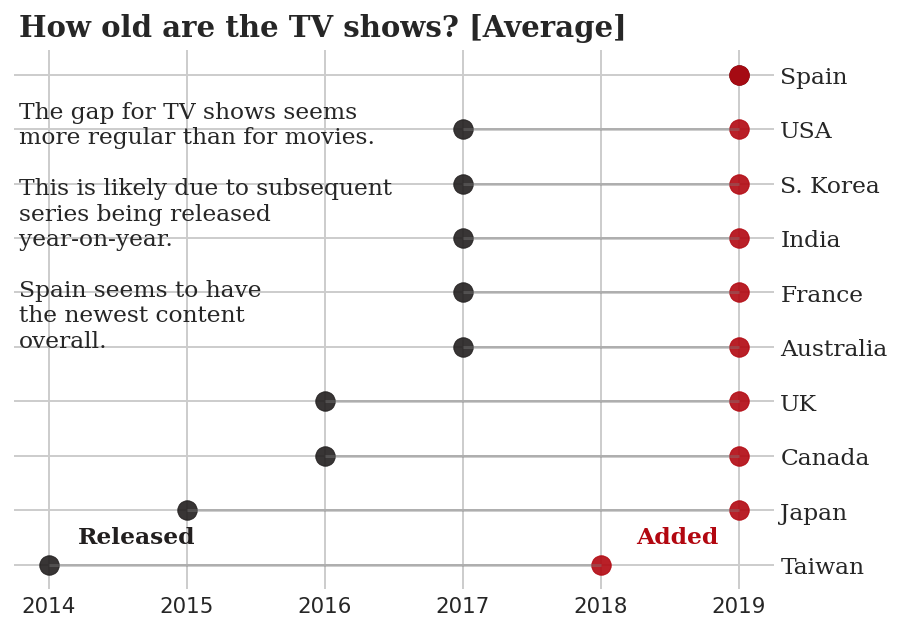

In [ ]:
#for TV Shows
data = df_tv.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_tv.loc[df_tv['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value:
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the TV shows? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.yaxis.tick_right()
plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)


fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')

fig.text(0.76,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')


fig.text(0.13, 0.42,
'''The gap for TV shows seems
more regular than for movies.

This is likely due to subsequent
series being released
year-on-year.

Spain seems to have
the newest content
overall.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


ax.tick_params(axis=u'both', which=u'both',length=0)
#plt.xlabel('Value of the variables')
#plt.ylabel('Group')
plt.show()

USA VS INDIA


In [ ]:
us_ind = netflix_df[(netflix_df['first_country'] == 'USA') | (netflix_df['first_country'] == 'India' )]

data_sub = netflix_df.groupby('first_country')['year_added'].value_counts().unstack().fillna(0).loc[['USA','India']].cumsum(axis=0).T

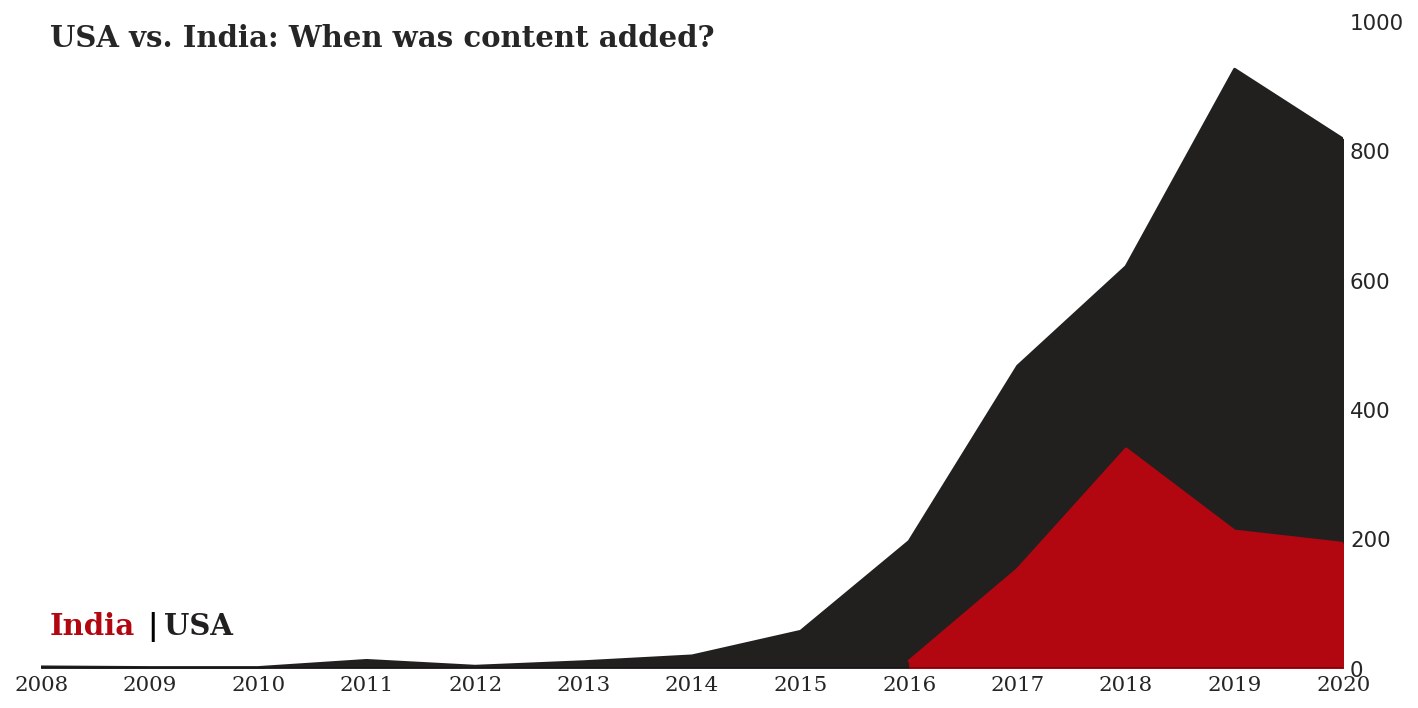

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ['#221f1f', '#b20710','#f5f5f1']

for i, hs in enumerate(us_ind['first_country'].value_counts().index):
    hs_built = us_ind[us_ind['first_country']==hs]['year_added'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color=color[i], label=hs)
    #ax.fill_between(hs_built.index, 0, hs_built, color=color[i], alpha=0.4)
    ax.fill_between(hs_built.index, 0, hs_built, color=color[i], label=hs)


ax.set_ylim(0, 1000)
#ax.legend(loc='upper left')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.yaxis.tick_right()

ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'USA vs. India: When was content added?', fontsize=15, fontweight='bold', fontfamily='serif')




fig.text(0.13,0.15,"India", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.188,0.15,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.198,0.15,"USA", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()
#We know from our work above that Netflix is dominated by the USA & India.
#It would also be reasonable to assume that, since Netflix is an American
#compnany, Netflix increased content first in the USA, before
#other nations.

#That is exactly what we see here; a slow and then rapid
#increase in content for the USA, followed by Netflix
#being launched to the Indian market in 2016.

MAPPING NETFLIX GLOBAL POPULARITY

In [ ]:
import geopandas
!pip install mapclassify

In [ ]:
import mapclassify

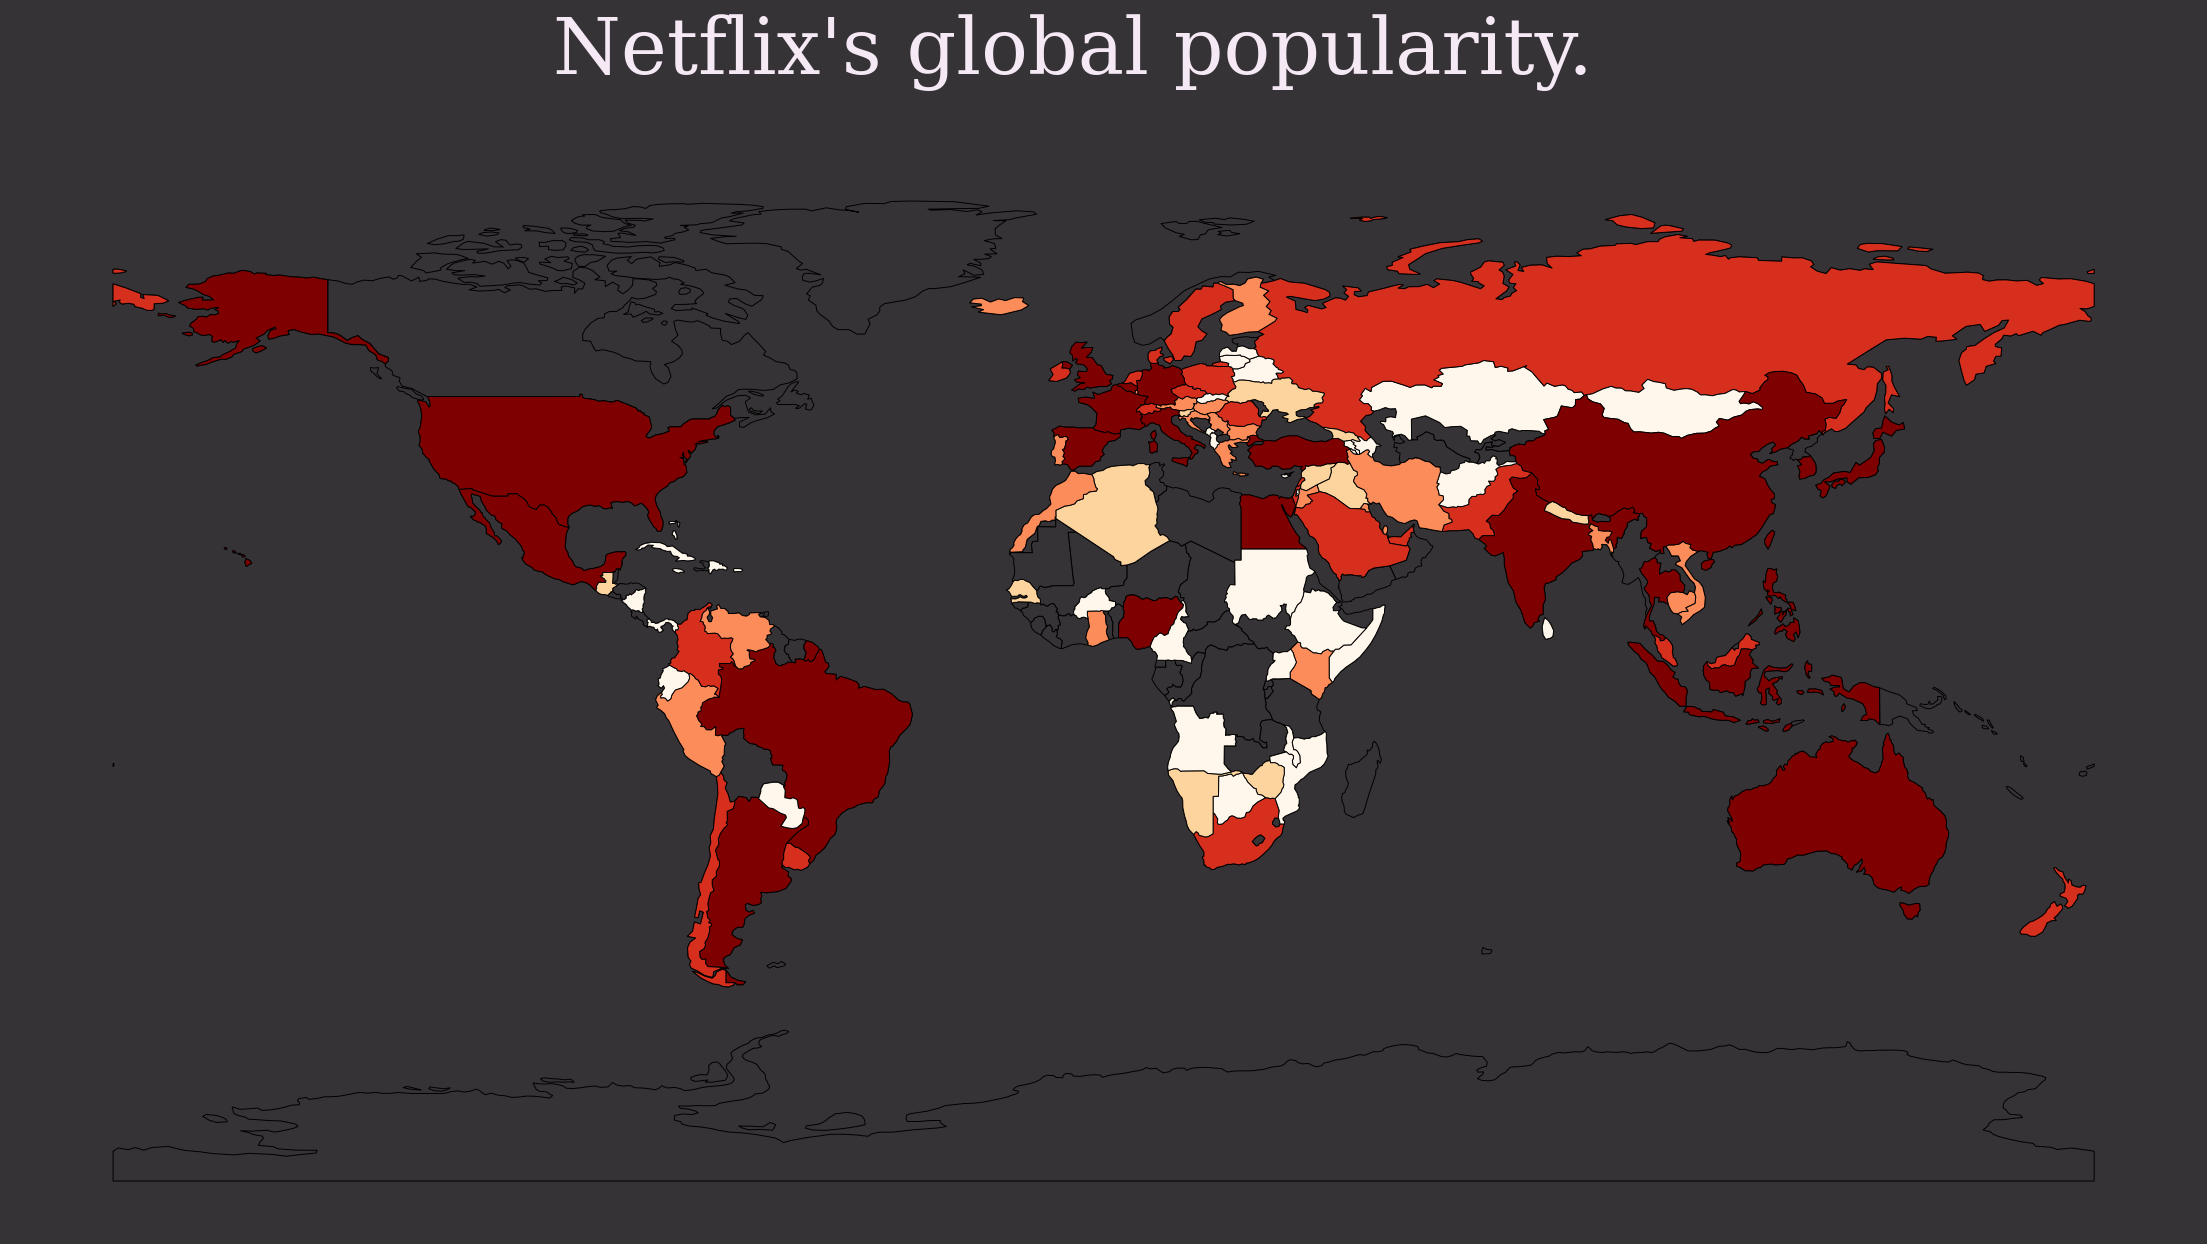

In [ ]:
not_have = {'South Korea' : 'KOR', 'West Germany' : 'DEU','Soviet Union':'SUN','East Germany':'DEU'}
for i in range(len(country_data['country'])):
    if country_data.loc[i, 'country'] in not_have.keys():
        country_data.loc[i, 'country'] = not_have[country_data.loc[i, 'country']]

country_data['country'] = country_data['country'].apply(lambda x : pycountry.countries.search_fuzzy(x)[0].alpha_3)
country_data = country_data.groupby('country').sum()
country_data = country_data.reset_index()

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world2 = world.merge(country_data,left_on ='iso_a3', right_on = 'country')

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world2 = world.merge(country_data,left_on ='iso_a3', right_on = 'country')

fig, ax = plt.subplots(figsize=(25,10),facecolor="#363336")
ax.patch.set_facecolor('#363336')
world.plot(ax=ax, color ="#363336",edgecolor='black')
world2.plot(column='count',ax=ax, cmap='OrRd', scheme='quantiles', edgecolor='black')
plt.text(s="Netflix's global popularity.", x=-100 ,y=110,fontfamily='serif',color='#F5E9F5', va="center",ha="left",fontsize=40)
plt.axis('off')
plt.show()

In [ ]:
#Netflix is enjoyed in most countries, without some of Africa.Especially, America and Ease Asia, Australia, India stand out

In [ ]:
#splitting overall dataset into tv shows and movies
netflix_shows=netflix_df[netflix_df['type']=='TV Show']
netflix_movies=netflix_df[netflix_df['type']=='Movie']

ANALYSIS OF MOVIES

Year wise analysis of movies


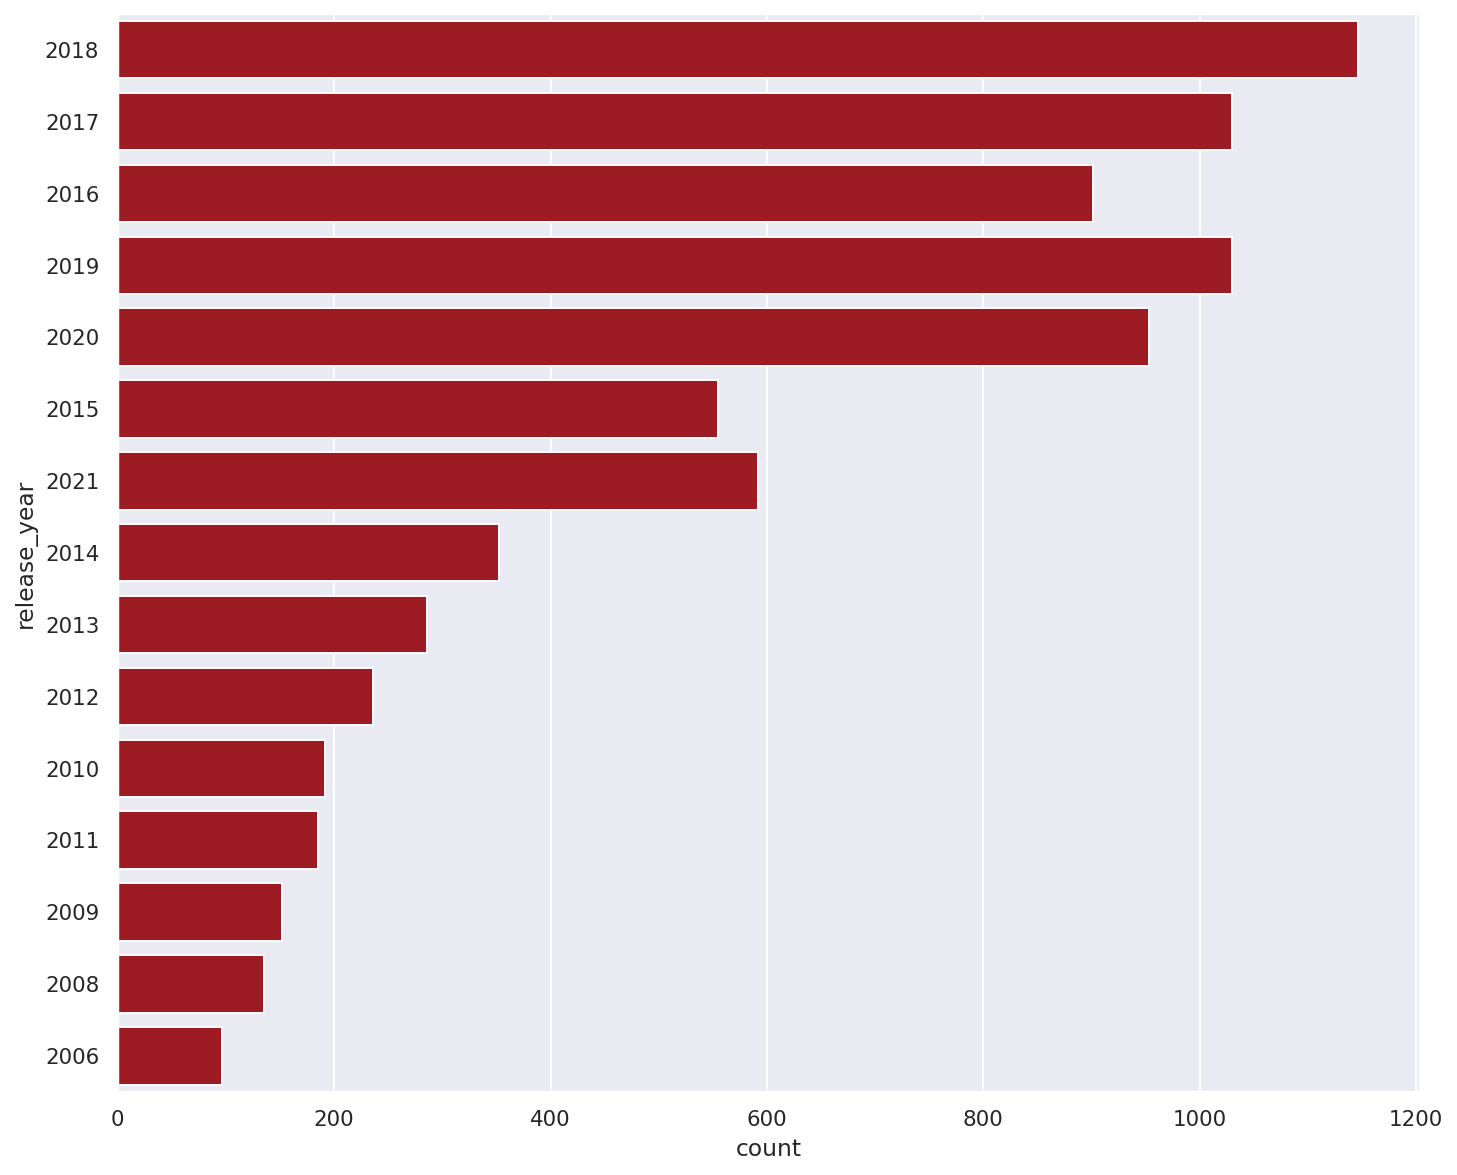

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_df, order=netflix_movies['release_year'].value_counts().index[0:15],color='#b20710')

In [ ]:
#So, 2018 was the year when most of the movies were released.

TOP 10 MOVIE CONTENT CREATING COUNTRIES


In [ ]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [ ]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no

countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'France'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'India')]

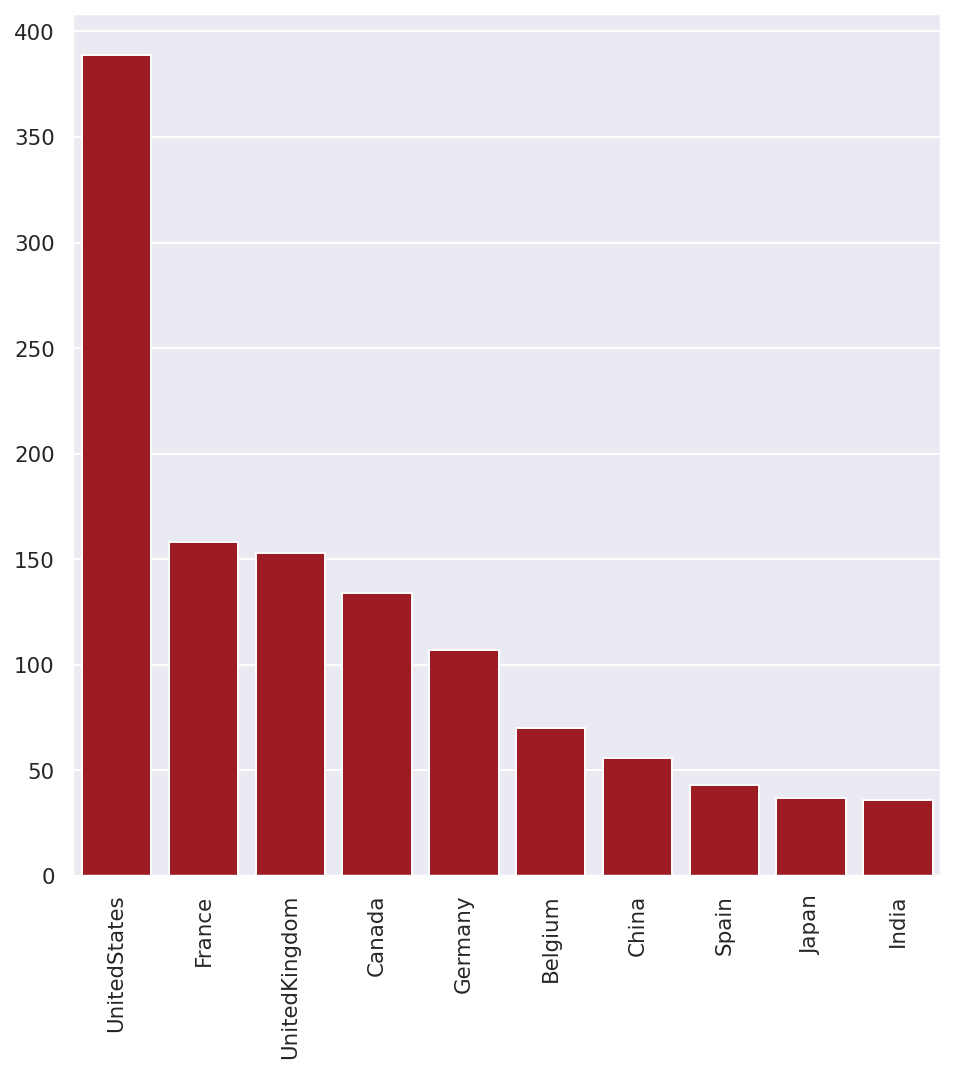

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10],color='#b20710')
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

In [ ]:
#Therefore, it is clear that US is the main movie content creator on Netflix.

Analysis of duration of movies

In [ ]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6126, dtype: int64

<Axes: xlabel='duration', ylabel='Density'>

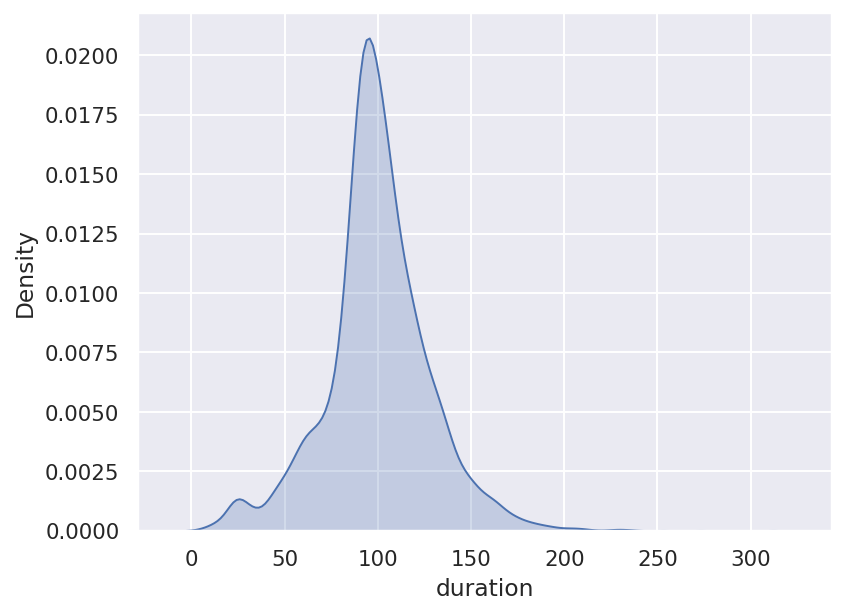

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

In [ ]:
#So, a good amount of movies on Netflix are among the duration of 75-120 mins.
#It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting

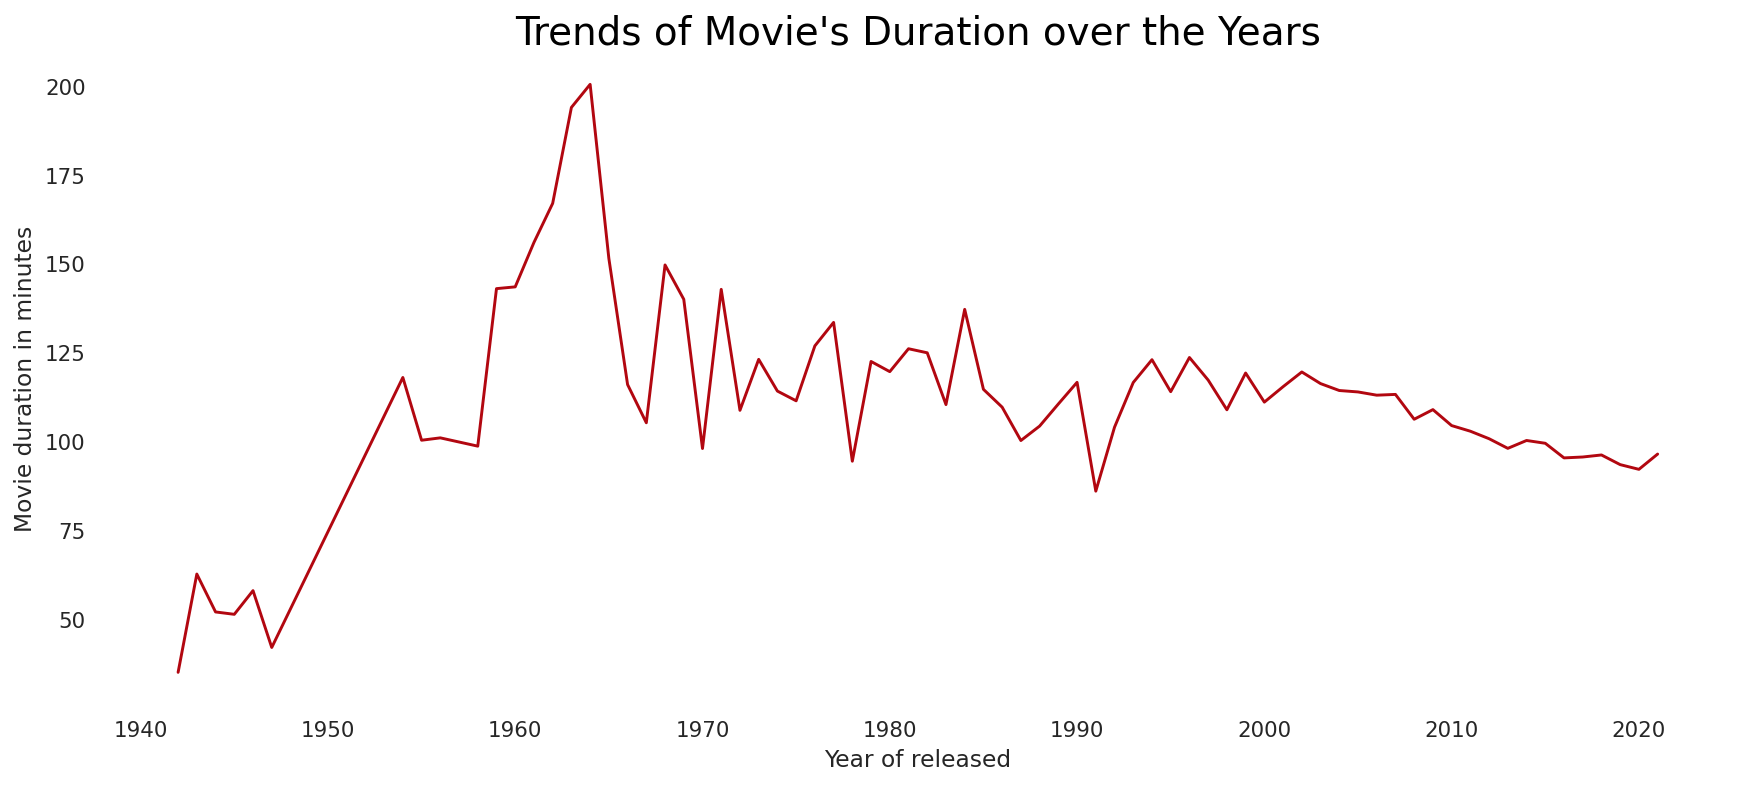

In [ ]:
duration_year = netflix_movies.groupby(['release_year']).mean()
duration_year = duration_year.sort_index()

plt.figure(figsize=(15,6))
sns.lineplot(x=duration_year.index, y=duration_year.duration.values,color='#b20710')
plt.box(on=None)
plt.ylabel('Movie duration in minutes');
plt.xlabel('Year of released');
plt.title("Trends of Movie's Duration over the Years", fontsize=20, color='black');

In [ ]:
#In the years of 1960 to 1965, Movies durations were over 200 minutes, after 1965 the durations became comparitively shorter.
#From the year 1980, we can see consistent trend of movie durations, of which duration time is around in between 100-150 minutes

Analysing IMDB ratings to get top rated movies on Netflix

In [ ]:
imdb_titles=pd.read_csv('/content/raw_titles.csv', usecols=['title','release_year','genres','imdb_score'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.release_year,
                    'Rating': imdb_titles.imdb_score,
                    'Genre':imdb_titles.genres})
ratings.drop_duplicates(subset=['Title','Release Year','Rating','Genre'], inplace=True)
ratings.shape

(5806, 4)

In [ ]:
#Performing inner join on the ratings dataset and netflix dataset to get the content that has both ratings on IMDB
# and are available on Netflix.
ratings.dropna()
joint_data=ratings.merge(netflix_df,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)
joint_data.head()

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,...,duration,listed_in,description,month_added,month_name_added,year_added,count,first_country,genre,target_ages
428,Khawatir,2005,9.6,['reality'],s369,TV Show,Khawatir,No Data,No Data,United States,...,1 Season,"International TV Shows, Reality TV",Saudi media personality Ahmad Al Shugairi trav...,7,July,2021,1,USA,"[International TV Shows, Reality TV]",Teens
149,Breaking Bad,2008,9.5,"['drama', 'thriller', 'crime']",s5941,TV Show,Breaking Bad,No Data,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,...,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,8,August,2013,1,USA,"[Crime TV Shows, TV Dramas, TV Thrillers]",Adults
2988,Kota Factory,2019,9.3,"['drama', 'comedy']",s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,...,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,1,India,"[International TV Shows, Romantic TV Shows, TV...",Adults
2561,Our Planet,2019,9.3,['documentation'],s3939,TV Show,Our Planet,No Data,David Attenborough,"United States, United Kingdom",...,1 Season,"Docuseries, Science & Nature TV",Experience our planet's natural beauty and exa...,4,April,2019,1,USA,"[Docuseries, Science & Nature TV]",Older Kids
163,Avatar: The Last Airbender,2005,9.3,"['scifi', 'family', 'fantasy', 'animation', 'a...",s2520,TV Show,Avatar: The Last Airbender,No Data,"Zach Tyler, Mae Whitman, Jack De Sena, Dee Bra...",United States,...,3 Seasons,"Classic & Cult TV, Kids' TV, TV Action & Adven...",Siblings Katara and Sokka wake young Aang from...,5,May,2020,1,USA,"[Classic & Cult TV, Kids' TV, TV Action & Adve...",Older Kids


Top rated 10 movies on Netflix

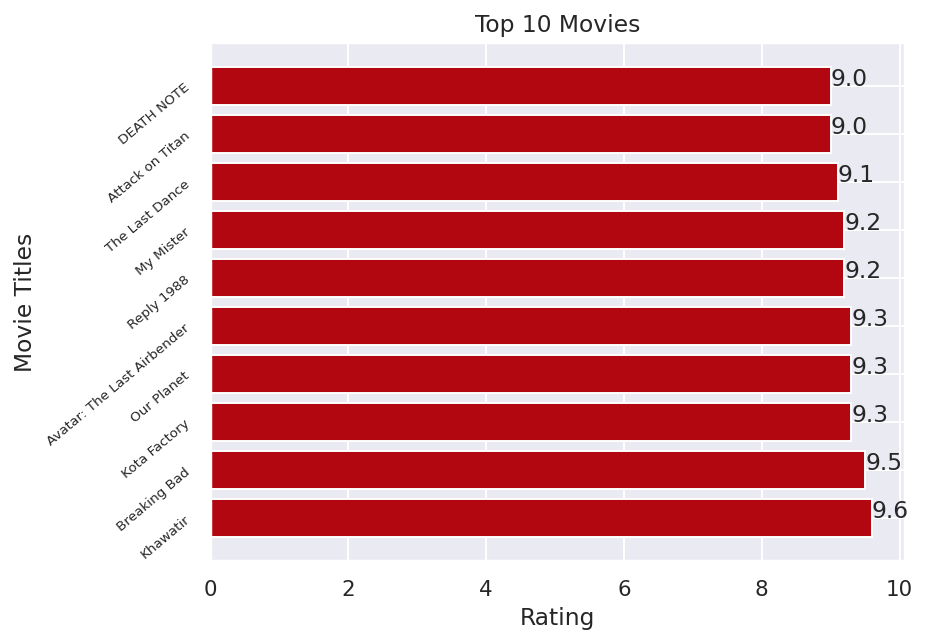

In [ ]:
import matplotlib.pyplot as plt

top_rated=joint_data[0:10]
d = {'Title': top_rated['Title'], 'Rating': top_rated['Rating']}

df = pd.DataFrame(d)
# Create bars and choose color
plt.barh(df.Title, df.Rating, color='#b20710')
x_pos = np.arange(len(df.Title))
# Add title and axis names
plt.title('Top 10 Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Titles')
for index, value in enumerate(df.Rating):
    plt.text(value, index,
             str(value))
plt.yticks(rotation=40, fontsize = 'xx-small')
# Show graph
plt.show()

In [ ]:
netflix_movies[netflix_movies.director != 'No Data']
netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,count,first_country,genre,target_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,1,USA,[Documentaries],Teens
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,September,2021,1,USA,[Children & Family Movies],Older Kids
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021,1,USA,"[Dramas, Independent Movies, International Mov...",Adults
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,September,2021,1,USA,"[Comedies, Dramas]",Teens
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,9,September,2021,1,Germany,"[Dramas, International Movies]",Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,3,March,2016,1,United Arab Emirates,"[Dramas, International Movies, Thrillers]",Adults
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,November,2019,1,USA,"[Cult Movies, Dramas, Thrillers]",Adults
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,November,2019,1,USA,"[Comedies, Horror Movies]",Adults
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,January,2020,1,USA,"[Children & Family Movies, Comedies]",Older Kids


Plot of Genres vs their count on Netflix

In [ ]:
from collections import Counter

genres=list(netflix_df['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

Text(0.5, 1.0, 'Genres')

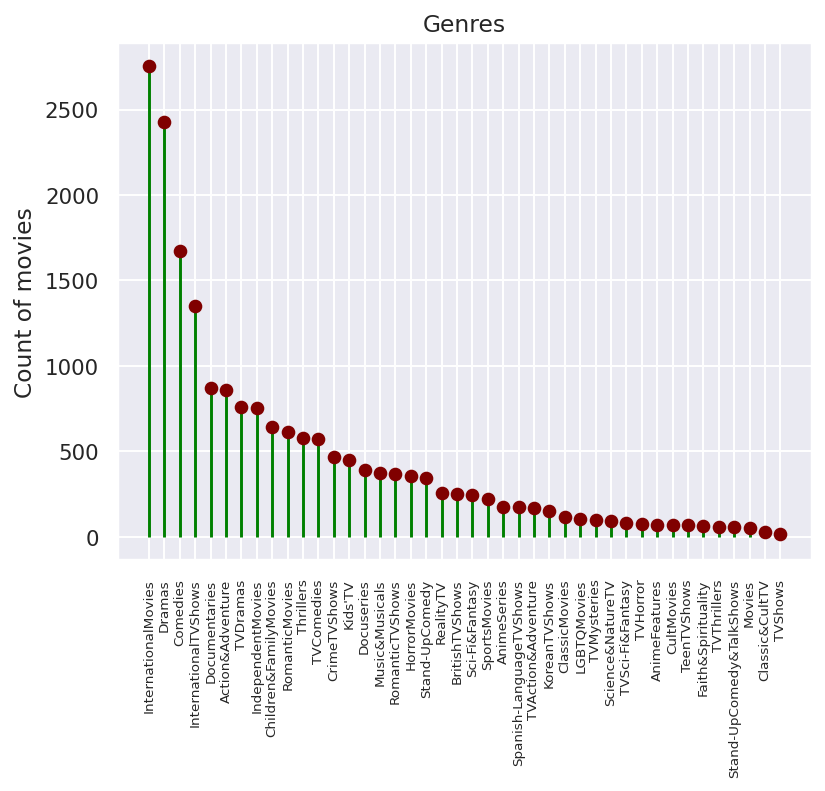

<Figure size 2800x2800 with 0 Axes>

In [ ]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (20, 20))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90,fontsize = 'xx-small')
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres")

ANALYSIS OF TV SHOWS


Most content creating countries

In [ ]:
countries1={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou=list(netflix_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

In [ ]:
countries_fin1={}
for country1,no in countries1.items():
    country1=country1.replace(' ','')
    if country1 in list(countries_fin1.keys()):
        countries_fin1[country1]+=no
    else:
        countries_fin1[country1]=no

countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'Canada'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Japan'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Germany'),
 Text(6, 0, 'Mexico'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Ireland'),
 Text(9, 0, 'Spain')]

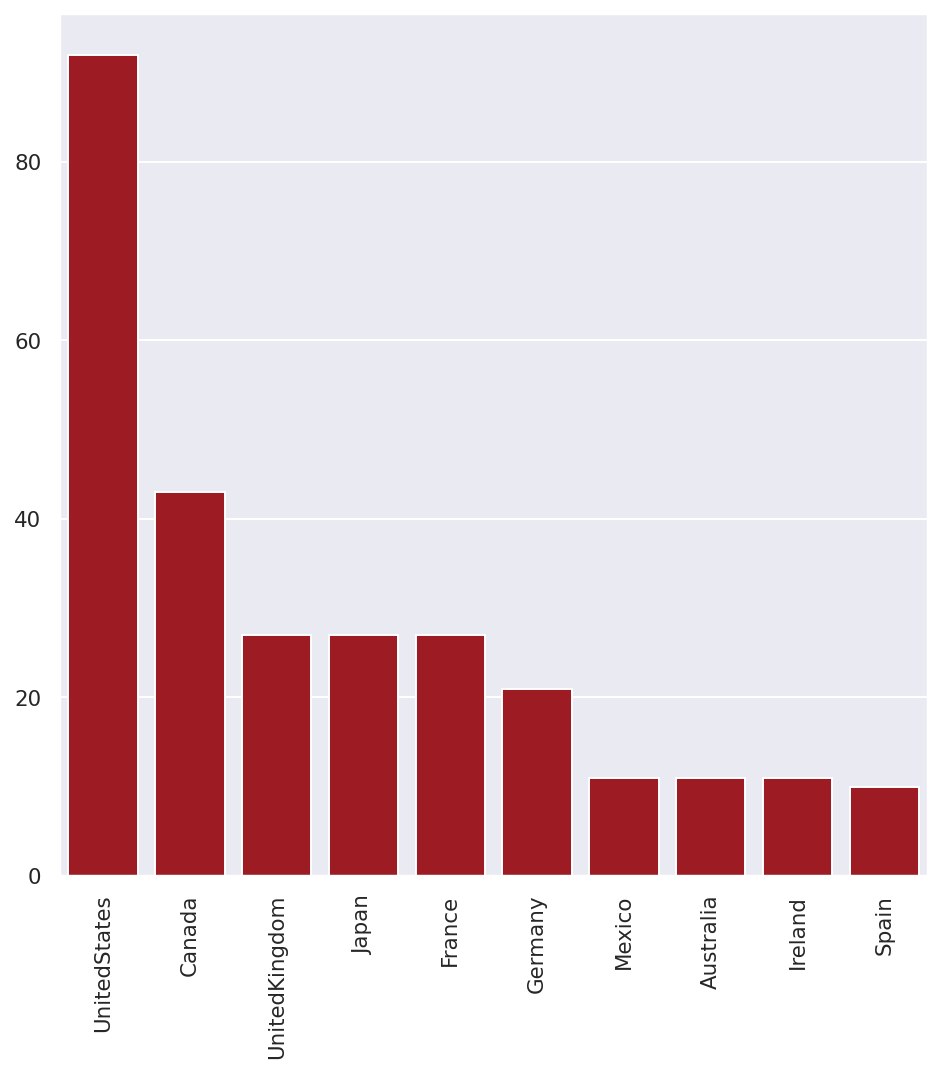

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin1.keys())[0:10],y=list(countries_fin1.values())[0:10],color='#b20710')
ax.set_xticklabels(list(countries_fin1.keys())[0:10],rotation = 90)

In [ ]:
#Naturally, United States has the most content that is created on netflix in the tv series category

In [ ]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

In [ ]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [ ]:
netflix_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,count,first_country,genre,target_ages
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,1,South Africa,"[International TV Shows, TV Dramas, TV Mysteries]",Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,1,USA,"[Crime TV Shows, International TV Shows, TV Ac...",Adults
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,1,USA,"[Docuseries, Reality TV]",Adults
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,1,India,"[International TV Shows, Romantic TV Shows, TV...",Adults
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9,September,2021,1,USA,"[TV Dramas, TV Horror, TV Mysteries]",Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,No Data,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,5,May,2018,1,Japan,"[Anime Series, Kids' TV]",Older Kids
8796,s8797,TV Show,Yunus Emre,No Data,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",1,January,2017,1,Turkey,"[International TV Shows, TV Dramas]",Older Kids
8797,s8798,TV Show,Zak Storm,No Data,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,9,September,2018,1,USA,[Kids' TV],Older Kids
8800,s8801,TV Show,Zindagi Gulzar Hai,No Data,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",12,December,2016,1,Pakistan,"[International TV Shows, Romantic TV Shows, TV...",Older Kids


In [ ]:
netflix_shows[netflix_shows.director != 'No Data']
netflix_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,count,first_country,genre,target_ages
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,1,South Africa,"[International TV Shows, TV Dramas, TV Mysteries]",Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,1,USA,"[Crime TV Shows, International TV Shows, TV Ac...",Adults
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,1,USA,"[Docuseries, Reality TV]",Adults
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,1,India,"[International TV Shows, Romantic TV Shows, TV...",Adults
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9,September,2021,1,USA,"[TV Dramas, TV Horror, TV Mysteries]",Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,No Data,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,5,May,2018,1,Japan,"[Anime Series, Kids' TV]",Older Kids
8796,s8797,TV Show,Yunus Emre,No Data,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",1,January,2017,1,Turkey,"[International TV Shows, TV Dramas]",Older Kids
8797,s8798,TV Show,Zak Storm,No Data,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,9,September,2018,1,USA,[Kids' TV],Older Kids
8800,s8801,TV Show,Zindagi Gulzar Hai,No Data,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",12,December,2016,1,Pakistan,"[International TV Shows, Romantic TV Shows, TV...",Older Kids


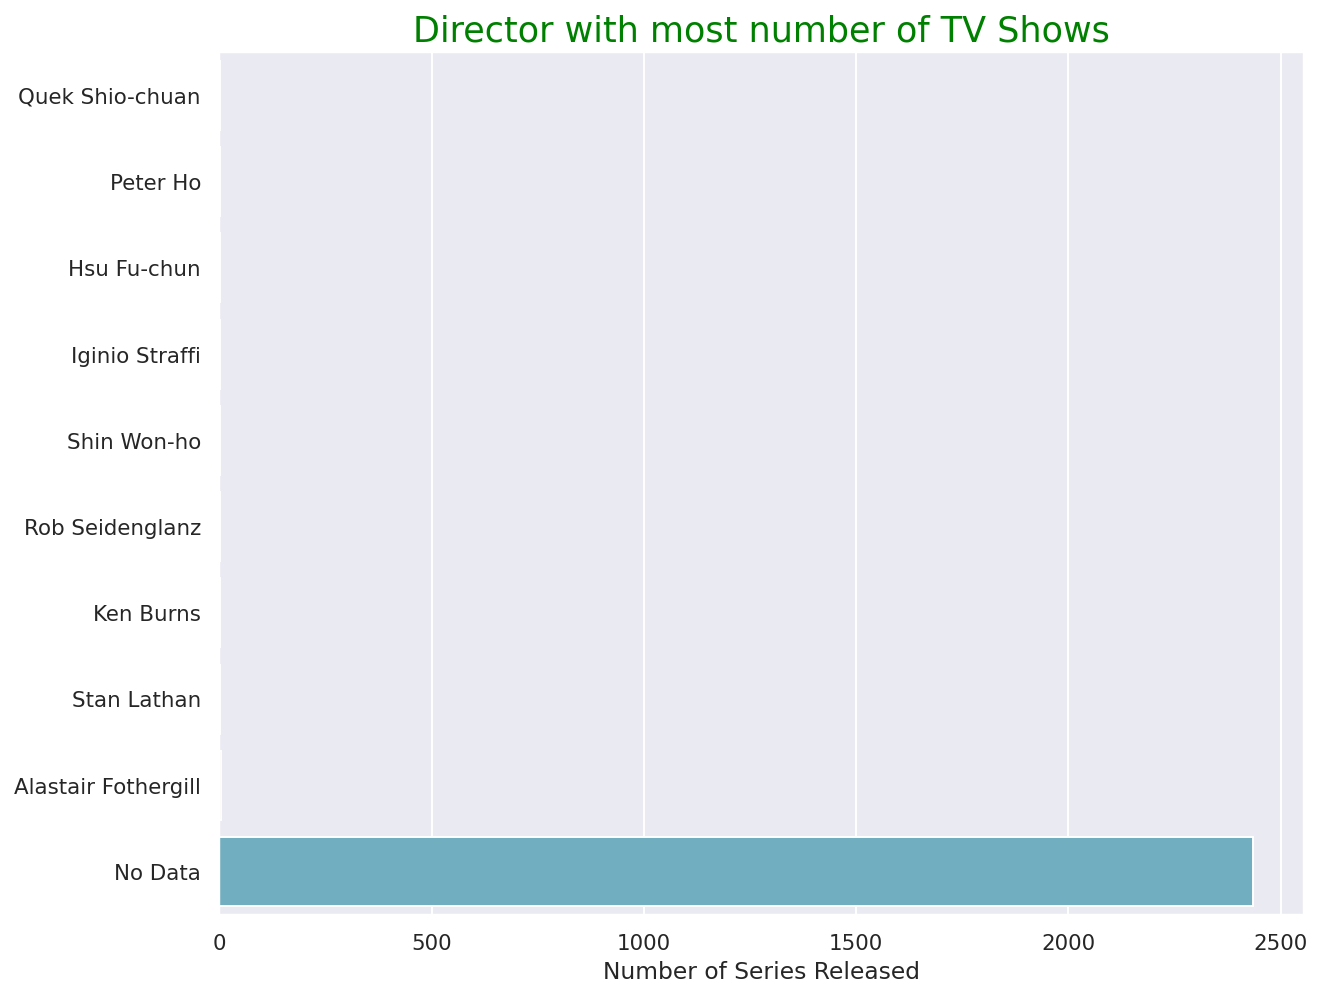

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y= netflix_shows.director.value_counts()[:10].sort_values().index, x=netflix_shows.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of TV Shows', color='green', fontsize=18)
plt.xlabel('Number of Series Released');

TV shows with largest number of seasons

In [ ]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)
top

,title,no_of_seasons
548,Grey's Anatomy,17
2423,Supernatural,15
4798,NCIS,15
4220,COMEDIANS of the world,13
1354,Heartland,13
...,...,...
3845,Cinta 100KG,1
3844,Bibik-Bibikku,1
3843,Away From Home,1
3840,The Society,1


<Axes: xlabel='title'>

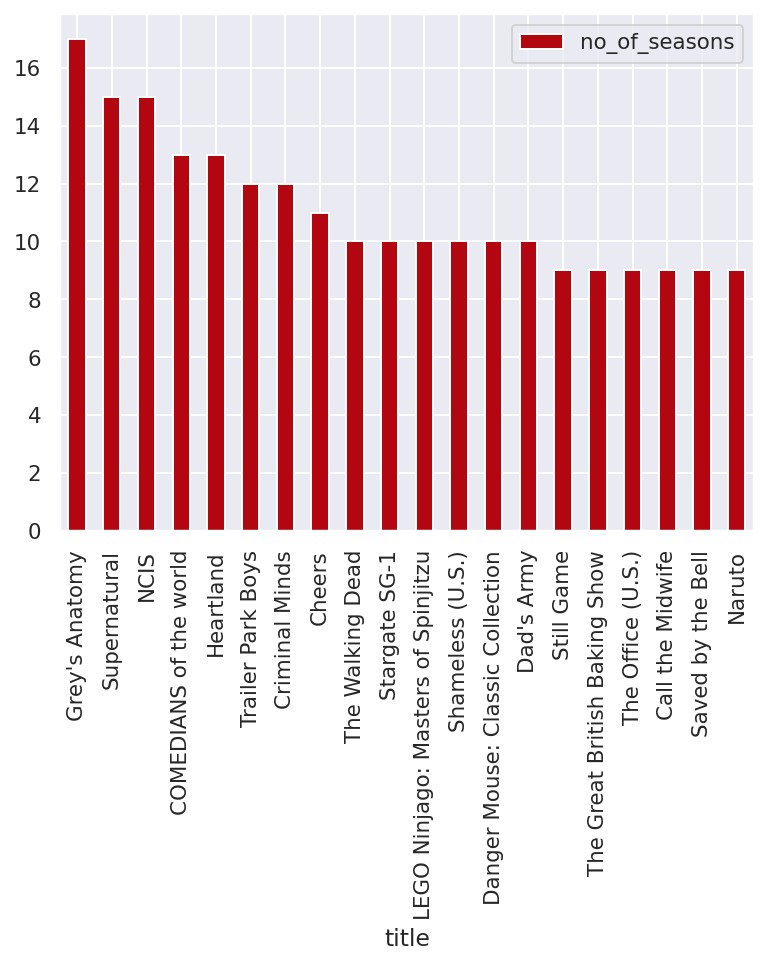

In [ ]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='#b20710')

In [ ]:
#Thus, NCIS, Grey's Anatomy and Supernatural are amongst the tv series that have highest number of seasons.

Lowest number of seasons


<Axes: xlabel='title'>

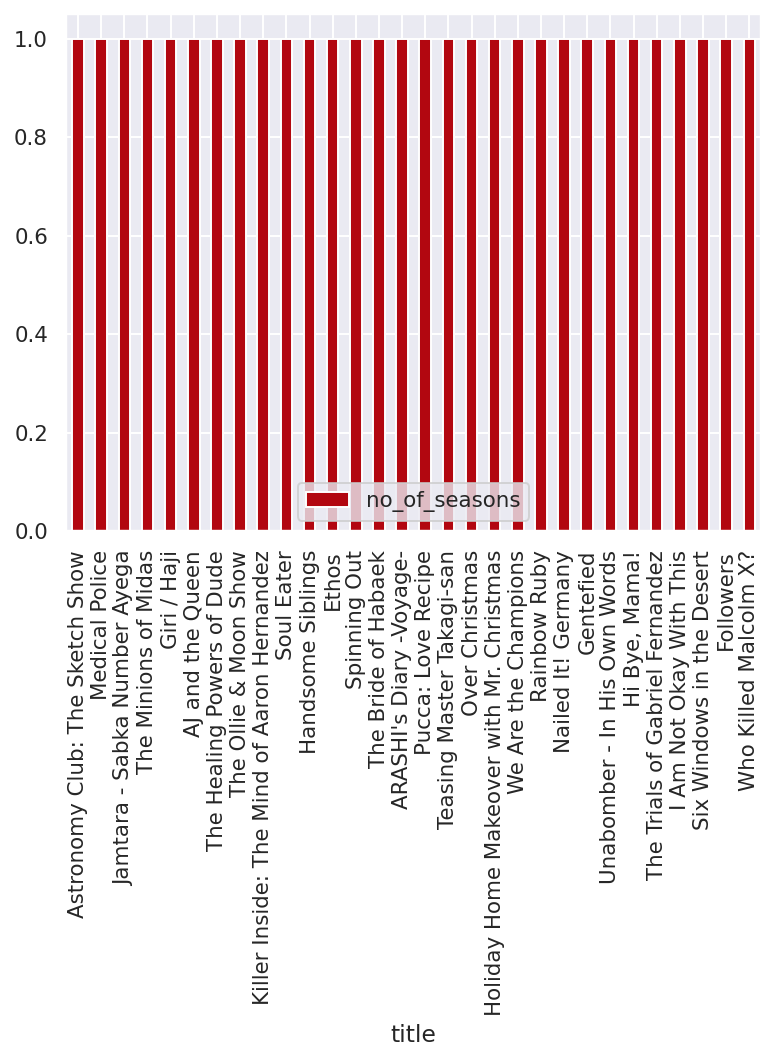

In [ ]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]
bottom.plot(kind='bar',x='title',y='no_of_seasons', color='#b20710')
#lowest no of seasons are 1
#These are some binge-worthy shows that are short and have only one season

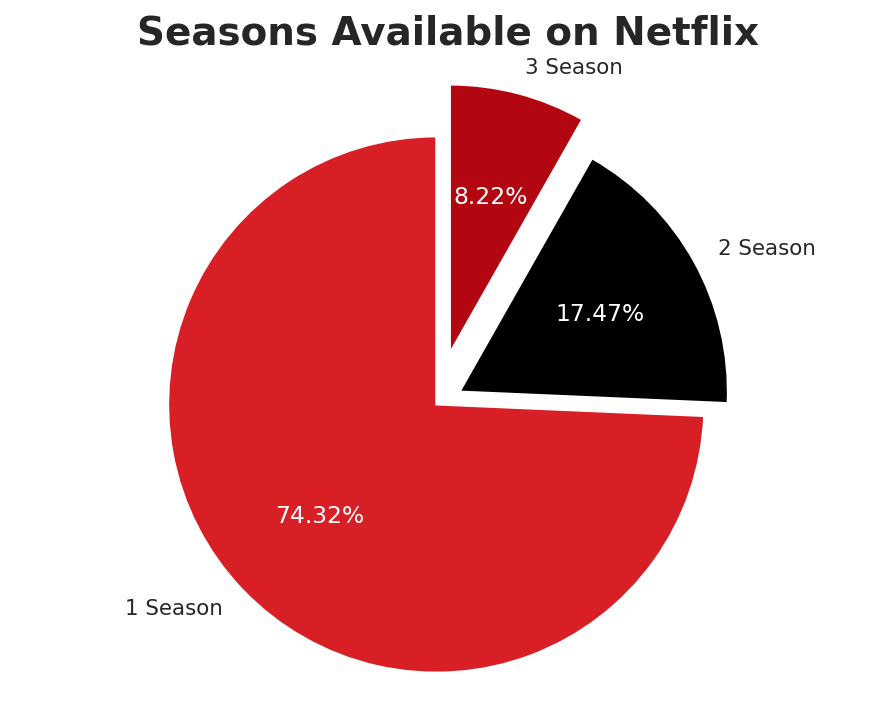

In [ ]:
# TV SHOWS AND THEIR SEASONS
plt.figure(figsize=(8, 6))
labels=['1 Season', '2 Season', '3 Season']
_, _, texts = plt.pie(netflix_shows.duration.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90,
                      explode=(0.0, 0.1, 0.2), colors=['#D81F26', 'black', '#b20710'])
plt.axis('equal')
plt.title('Seasons Available on Netflix', fontsize=20, fontweight='bold');
for text in texts:
    text.set_color('white')

In [ ]:
#From the chart we can analyze, 74% TV Shows has only 1 Season,17% TV Shows has 2 seasons and 8% Tv Shows has 3 seasons available

OLDEST MOVIES

In [ ]:
oldest = netflix_movies.sort_values("release_year", ascending = True)
oldest = oldest[oldest['duration'] != ""]
display(oldest[['title', "release_year", 'listed_in','country']][:10])


,title,release_year,listed_in,country
7790,Prelude to War,1942,"Classic Movies, Documentaries",United States
8205,The Battle of Midway,1942,"Classic Movies, Documentaries",United States
8763,WWII: Report from the Aleutians,1943,Documentaries,United States
8660,Undercover: How to Operate Behind Enemy Lines,1943,"Classic Movies, Documentaries",United States
8739,Why We Fight: The Battle of Russia,1943,Documentaries,United States
8640,Tunisian Victory,1944,"Classic Movies, Documentaries","United States, United Kingdom"
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944,"Classic Movies, Documentaries",United States
8436,The Negro Soldier,1944,"Classic Movies, Documentaries",United States
7219,Know Your Enemy - Japan,1945,"Classic Movies, Documentaries",United States
7575,Nazi Concentration Camps,1945,"Classic Movies, Documentaries",United States


OLDEST TV SHOWS

In [ ]:
oldest = netflix_shows.sort_values("release_year", ascending = True)
oldest = oldest[oldest['duration'] != ""]
display(oldest[['title', "release_year", 'listed_in','country']][:10])

,title,release_year,listed_in,country
4250,Pioneers: First Women Filmmakers*,1925,TV Shows,United States
1331,Five Came Back: The Reference Films,1945,TV Shows,United States
7743,Pioneers of African-American Cinema,1946,TV Shows,United States
8541,The Twilight Zone (Original Series),1963,"Classic & Cult TV, TV Sci-Fi & Fantasy",United States
8189,The Andy Griffith Show,1967,"Classic & Cult TV, TV Comedies",United States
4550,Monty Python's Fliegender Zirkus,1972,"International TV Shows, TV Comedies","United Kingdom, West Germany"
4551,Monty Python's Flying Circus,1974,"British TV Shows, Classic & Cult TV, Internati...",United Kingdom
6549,Dad's Army,1977,"British TV Shows, Classic & Cult TV, TV Comedies",United Kingdom
6674,El Chavo,1979,"Classic & Cult TV, Kids' TV, Spanish-Language ...",Mexico
7588,Ninja Hattori,1981,"Anime Series, Kids' TV",Japan


Newest Movies

In [ ]:
newest = netflix_movies.sort_values("release_year", ascending = False)
newest = newest[newest['duration'] != ""]
display(newest[['title', "release_year", 'listed_in','country']][:10])

,title,release_year,listed_in,country
961,The Mitchells vs. The Machines,2021,"Children & Family Movies, Comedies",United States
1281,Red,2021,"Dramas, International Movies",India
624,Prime Time,2021,"Dramas, International Movies, Thrillers",United States
623,Mommy Issues,2021,"Comedies, Dramas, International Movies",United States
1290,I Care a Lot,2021,"Comedies, LGBTQ Movies, Thrillers","United Kingdom, United States"
618,America: The Motion Picture,2021,"Action & Adventure, Comedies",United States
1304,Animals on the Loose: A You vs. Wild Movie,2021,Children & Family Movies,United States
1311,Namaste Wahala,2021,"Comedies, Dramas, International Movies",Nigeria
1315,Hate by Dani Rovira,2021,Stand-Up Comedy,Spain
1318,To All The Boys: Always And Forever,2021,"Comedies, Romantic Movies",United States


Newest TV Shows

In [ ]:
newest = netflix_shows.sort_values("release_year", ascending = False)
newest = newest[newest['duration'] != ""]
display(newest[['title', "release_year", 'listed_in','country']][:10])

,title,release_year,listed_in,country
1,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries",South Africa
837,Ragnarok,2021,"International TV Shows, TV Action & Adventure,...","Norway, Denmark"
879,Halston,2021,TV Dramas,United States
876,Alma Matters,2021,"Docuseries, International TV Shows",India
874,Booba: Food Puzzle,2021,Kids' TV,United Kingdom
862,Special,2021,TV Comedies,United States
857,The Neighbor,2021,"International TV Shows, Spanish-Language TV Sh...",Spain
855,Jurassic World Camp Cretaceous,2021,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...",United States
848,Master of None,2021,"TV Comedies, TV Dramas",United States
847,Mad for Each Other,2021,"International TV Shows, Romantic TV Shows, TV ...",United States


'TOP 10 MOVIES ACTORS FROM INDIA WITH MOST CONTENT'

In [ ]:
temp_df = netflix_df[netflix_df['type']=='Movie']
temp_df = temp_df[temp_df['country']=='India']
categories = ", ".join(temp_df['cast'].fillna("")).split(", ")
counter_list = Counter(categories).most_common(11)
counter_list

[('Anupam Kher', 40),
 ('Shah Rukh Khan', 32),
 ('Naseeruddin Shah', 29),
 ('Akshay Kumar', 28),
 ('Amitabh Bachchan', 28),
 ('Paresh Rawal', 27),
 ('Om Puri', 26),
 ('Kareena Kapoor', 24),
 ('Boman Irani', 23),
 ('Ajay Devgn', 20),
 ('Salman Khan', 20)]

RECOMMENDATION SYSTEM (CONTENT BASED)

In [ ]:
#TF-IDF stands for Term Frequency Inverse Document Frequency of records.
#It can be defined as the calculation of how relevant a word in a series is to a text.
#The meaning increases proportionally to the number of times in the text a word appears
#but is compensated by the word frequency in the data-set.

In [ ]:
#The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word
#occurring in a document, down-weighted by the number of documents in which it occurs.
#This is done to reduce the importance of words that occur frequently in plot overviews and therefore,
#their significance in computing the final similarity score

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_df['description'] = netflix_df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8790, 18878)

In [ ]:
#There are 8790 words described for 18878 movies in the dataset

In [ ]:
#Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(netflix_df.index, index=netflix_df['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_df['title'].iloc[movie_indices]
#This recommendation is just based on the Plot.

In [ ]:
get_recommendations('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [ ]:
get_recommendations('Mortel')

256                       Nneka The Pretty Serpent
3674                  PILI Fantasy: War of Dragons
800                                Mosquita y Mari
6749                             Figures of Speech
4511         Edgar Rice Burroughs' Tarzan and Jane
7535    My Entire High School Sinking Into the Sea
6760                                     FirstBorn
4918                                 Psychokinesis
5481                                     Chamatkar
2190                          The Umbrella Academy
Name: title, dtype: object

In [ ]:
get_recommendations('The Starling')

7533      My Daddy is in Heaven
2514       The Big Flower Fight
1899       Turkish Dance School
3854    In the Bosom of a Thorn
3122                 Soundtrack
1557                     Canvas
4720              Chillar Party
2502          Escaping Tel Aviv
6688             Emma' (Mother)
2123      Dérè: An African Tale
Name: title, dtype: object

In [ ]:
#It is seen that the model performs well, but is not very accurate.
#Therefore, more metrics are added to the model to improve performance.

Content based filtering on multiple metrics

Content based filtering on the following factors:

Title,
Cast,
Director,
Listed in,
Plot

In [ ]:
#Filling null values with empty string.
filledna=netflix_df.fillna('')
filledna.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,count,first_country,genre,target_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,1,USA,[Documentaries],Teens
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,1,South Africa,"[International TV Shows, TV Dramas, TV Mysteries]",Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,1,USA,"[Crime TV Shows, International TV Shows, TV Ac...",Adults
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,1,USA,"[Docuseries, Reality TV]",Adults
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,1,India,"[International TV Shows, Romantic TV Shows, TV...",Adults


In [ ]:
#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [ ]:
#Identifying features on which the model is to be filtered
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [ ]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)

filledna.head()

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,nodata,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,nodata,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille..."
3,jailbirdsneworleans,nodata,nodata,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein..."
4,kotafactory,nodata,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...","internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...


In [ ]:
#Creating a "bag of words" for all rows.
def create_bow(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [ ]:
filledna['soup'] = filledna.apply(create_bow, axis=1)

In [ ]:
#From here on, the code is basically similar to the upper model except the fact that count vectorizer is used instead of tfidf

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [ ]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    print(sim_scores)
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    similarity=netflix_df['title'].iloc[movie_indices]
    # Return the top 10 most similar movies
    return similarity

In [ ]:
movie_name=input("Enter you favorite movie: ")


Enter you favorite movie: pk


In [ ]:
#creating a list of with all movies in the dataset
list_of_all_movies=netflix_df['title'].tolist()
print(list_of_all_movies)

['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', 'Jailbirds New Orleans', 'Kota Factory', 'Midnight Mass', 'My Little Pony: A New Generation', 'Sankofa', 'The Great British Baking Show', 'The Starling', 'Vendetta: Truth, Lies and The Mafia', 'Bangkok Breaking', 'Je Suis Karl', 'Confessions of an Invisible Girl', 'Crime Stories: India Detectives', 'Dear White People', "Europe's Most Dangerous Man: Otto Skorzeny in Spain", 'Falsa identidad', 'Intrusion', 'Jaguar', 'Monsters Inside: The 24 Faces of Billy Milligan', 'Resurrection: Ertugrul', 'Avvai Shanmughi', 'Go! Go! Cory Carson: Chrissy Takes the Wheel', 'Jeans', 'Love on the Spectrum', 'Minsara Kanavu', 'Grown Ups', 'Dark Skies', 'Paranoia', 'Ankahi Kahaniya', 'Chicago Party Aunt', 'Sex Education', 'Squid Game', 'Tayo and Little Wizards', 'The Father Who Moves Mountains', 'The Stronghold', 'Angry Birds', 'Birth of the Dragon', 'Chhota Bheem', 'He-Man and the Masters of the Universe', 'Jaws', 'Jaws 2', 'Jaws 3', 'Jaws: The Revenge

In [ ]:
#finding related recommendations
find_close_match=get_recommendations_new(movie_name,cosine_sim2)

[(1114, 0.3889222341312986), (8374, 0.3223291856101521), (4790, 0.28571428571428575), (1022, 0.2760262237369417), (4507, 0.2760262237369417), (2720, 0.2672612419124244), (4427, 0.2672612419124244), (6433, 0.2672612419124244), (6897, 0.2672612419124244), (195, 0.25928148942086576)]


In [ ]:
find_close_match

1114                           3 Idiots
8391       The Legend of Michael Mishra
4790                  Anthony Kaun Hai?
1022                   Taare Zameen Par
4507                              Sanju
2720                            Dostana
4427                    Chance Pe Dance
6439                    Chal Dhar Pakad
6907                             Haapus
195     EMI: Liya Hai To Chukana Padega
Name: title, dtype: object

In [ ]:
get_recommendations_new('PK', cosine_sim2)

In [ ]:
get_recommendations_new('The Hook Up Plan', cosine_sim2)

In [ ]:
get_recommendations_new('Dancing Angels',cosine_sim2)